# Fin du prétraitement : des inputs de même longueur et prêts pour le CNN

Pour pouvoir exécuter notre réseau de neurone (CNN), nous avons besoin de traiter encore nos données. 

En effet, notre modèle va apprendre les caractéristiques générales de plusieurs vols entre deux évenèments (WW ou SV), pour chaque avion. Cependant, pour que nous puissions effectuer un réseau de neurones, nous avons besoin d'avoir des intervalles "de même longueur", c'est à dire avec le même nombre de vols pour chaque intervalles. Pour l'instant, certains avions ont plus de 9000 vols entre deux évènements tandis que d'autres en ont très peu, et c'est pourquoi nous devons les traiter.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Importation des données pré-traitées par Louise
path_df = r'D:/Données/ENSAE/2A/S2/Séminaire de modélisation statistique/pretraitement.csv'
safran=pd.read_csv(path_df ,sep=',', encoding='latin-1')

In [3]:
safran

date  Unnamed: 0 engine_serial_number  \
0        2019-04-29 06:29:58           1                ESN_1   
1        2019-04-29 08:10:00           2                ESN_1   
2        2019-04-29 09:55:00           3                ESN_1   
3        2019-04-29 11:36:53           4                ESN_1   
4        2019-04-30 04:28:40           5                ESN_1   
...                      ...         ...                  ...   
2450270  2022-10-26 07:39:15     2911298             ESN_1369   
2450271  2022-10-26 11:36:39     2911299             ESN_1369   
2450272  2022-10-27 03:55:34     2911301             ESN_1369   
2450273  2022-10-27 07:33:12     2911302             ESN_1369   
2450274  2022-10-27 11:38:03     2911303             ESN_1369   

           engine_family    engine_series     cycles  cycles_counter  \
0        Engine_family_1  Engine_series_1  14.699402              14   
1        Engine_family_1  Engine_series_1  15.284274              15   
2        Engine_family_1  Engine_series_1  15.898185              16   
3        Engine_family_1  Engine_series_1  16.493874              17   
4        Engine_family_1  Engine_series_1  22.409543              18   
...                  ...              ...        ...             ...   
2450270  Engine_family_1  Engine_series_6  34.993550              50   
2450271  Engine_family_1  Engine_series_6  35.190820              51   
2450272  Engine_family_1  Engine_series_6  36.001950              53   
2450273  Engine_family_1  Engine_series_6  36.182090              54   
2450274  Engine_family_1  Engine_series_6  36.385680              55   

         egt_margin  var_mot_1  flight_leg_hours  ...  \
0          0.881646  -0.313549          0.857778  ...   
1          0.792029   0.006330          0.794167  ...   
2          0.706729  -0.286324          0.736667  ...   
3          0.702078   0.430174          0.802500  ...   
4          0.645941   0.299420          0.817500  ...   
...             ...        ...               ...  ...   
2450270    0.531868  -0.731730          2.654444  ...   
2450271    0.973045   0.364383          2.501667  ...   
2450272    0.800778   0.949444          2.165000  ...   
2450273    0.619281  -0.748008          2.536667  ...   
2450274    0.622657  -0.185830          2.263056  ...   

         Interpolate_flight_leg_hours  Interpolate_SV_rank  \
0                            0.857778                  0.0   
1                            0.794167                  0.0   
2                            0.736667                  0.0   
3                            0.802500                  0.0   
4                            0.817500                  0.0   
...                               ...                  ...   
2450270                      2.654444                  0.0   
2450271                      2.501667                  0.0   
2450272                      2.165000                  0.0   
2450273                      2.536667                  0.0   
2450274                      2.263056                  0.0   

         Interpolate_Config_B_rank  Interpolate_WW_rank  \
0                              0.0                  0.0   
1                              0.0                  0.0   
2                              0.0                  0.0   
3                              0.0                  0.0   
4                              0.0                  0.0   
...                            ...                  ...   
2450270                        0.0                  0.0   
2450271                        0.0                  0.0   
2450272                        0.0                  0.0   
2450273                        0.0                  0.0   
2450274                        0.0                  0.0   

         Interpolate_var_env_1  Interpolate_var_env_2  Interpolate_var_env_3  \
0                    -0.261068               0.193871               0.448627   
1                    -0.064202               0.273855               1.500848   

In [4]:
safran.columns

Index(['date', 'Unnamed: 0', 'engine_serial_number', 'engine_family',
       'engine_series', 'cycles', 'cycles_counter', 'egt_margin', 'var_mot_1',
       'flight_leg_hours', 'event_rank', 'egt_slope', 'SV_indicator',
       'SV_rank', 'Config_B_indicator', 'Config_B_rank', 'WW_indicator',
       'WW_rank', 'config_A', 'config_B', 'var_env_1', 'var_env_2',
       'var_env_3', 'var_env_4', 'var_env_5', 'Interpolate_egt_margin',
       'Interpolate_var_mot_1', 'Interpolate_flight_leg_hours',
       'Interpolate_SV_rank', 'Interpolate_Config_B_rank',
       'Interpolate_WW_rank', 'Interpolate_var_env_1', 'Interpolate_var_env_2',
       'Interpolate_var_env_3', 'Interpolate_var_env_4',
       'Interpolate_var_env_5', 'Interpolate_egt_slope'],
      dtype='object')

In [5]:
#Pour plus de clarté, je ne garde que les colonnes qui ont déja été travaillées et celles nécessaires au traitement des intervalles
safran_2 = safran[['date', "engine_serial_number",'engine_series', 'cycles', 'cycles_counter','Interpolate_egt_margin',
       'Interpolate_var_mot_1','event_rank', 'config_A', 'config_B','Interpolate_flight_leg_hours',
       'Interpolate_SV_rank', 'Interpolate_Config_B_rank',
       'Interpolate_WW_rank', 'Interpolate_var_env_1', 'Interpolate_var_env_2',
       'Interpolate_var_env_3', 'Interpolate_var_env_4',
       'Interpolate_var_env_5', 'Interpolate_egt_slope']]


In [6]:
safran_2

date engine_serial_number    engine_series     cycles  \
0        2019-04-29 06:29:58                ESN_1  Engine_series_1  14.699402   
1        2019-04-29 08:10:00                ESN_1  Engine_series_1  15.284274   
2        2019-04-29 09:55:00                ESN_1  Engine_series_1  15.898185   
3        2019-04-29 11:36:53                ESN_1  Engine_series_1  16.493874   
4        2019-04-30 04:28:40                ESN_1  Engine_series_1  22.409543   
...                      ...                  ...              ...        ...   
2450270  2022-10-26 07:39:15             ESN_1369  Engine_series_6  34.993550   
2450271  2022-10-26 11:36:39             ESN_1369  Engine_series_6  35.190820   
2450272  2022-10-27 03:55:34             ESN_1369  Engine_series_6  36.001950   
2450273  2022-10-27 07:33:12             ESN_1369  Engine_series_6  36.182090   
2450274  2022-10-27 11:38:03             ESN_1369  Engine_series_6  36.385680   

         cycles_counter  Interpolate_egt_margin  Interpolate_var_mot_1  \
0                    14                0.881646              -0.313549   
1                    15                0.792029               0.006330   
2                    16                0.706729              -0.286324   
3                    17                0.702078               0.430174   
4                    18                0.645941               0.299420   
...                 ...                     ...                    ...   
2450270              50                0.531868              -0.731730   
2450271              51                0.973045               0.364383   
2450272              53                0.800778               0.949444   
2450273              54                0.619281              -0.748008   
2450274              55                0.622657              -0.185830   

         event_rank    config_A    config_B  Interpolate_flight_leg_hours  \
0                 0  Config_A_1  Config_B_1                      0.857778   
1                 0  Config_A_1  Config_B_1                      0.794167   
2                 0  Config_A_1  Config_B_1                      0.736667   
3                 0  Config_A_1  Config_B_1                      0.802500   
4                 0  Config_A_1  Config_B_1                      0.817500   
...             ...         ...         ...                           ...   
2450270           0  Config_A_3  Config_B_1                      2.654444   
2450271           0  Config_A_3  Config_B_1                      2.501667   
2450272           0  Config_A_3  Config_B_1                      2.165000   
2450273           0  Config_A_3  Config_B_1                      2.536667   
2450274           0  Config_A_3  Config_B_1                      2.263056   

         Interpolate_SV_rank  Interpolate_Config_B_rank  Interpolate_WW_rank  \
0                        0.0                        0.0                  0.0   
1                        0.0                        0.0                  0.0   
2                        0.0                        0.0                  0.0   
3                        0.0                        0.0                  0.0   
4                        0.0                        0.0                  0.0   
...                      ...                        ...                  ...   
2450270                  0.0                        0.0                  0.0   
2450271                  0.0                        0.0                  0.0   
2450272                  0.0                        0.0                  0.0   
2450273                  0.0                        0.0                  0.0   
2450274                  0.0                        0.0                  0.0   

         Interpolate_var_env_1  Interpolate_var_env_2  Interpolate_var_env_3  \
0                    -0.261068               0.193871               0.448627   
1                    -0.064202               0.273855               1.500848   
2                    -0.292673      

## 1) Choix de la taille de l'intervalle

On utilise la variable **event_rank** pour identifier tous les intervalles pendant lequel aucun évènement n'a été effectué.

In [7]:
safran_ER = safran_2[["engine_serial_number", "event_rank", "Interpolate_egt_slope"]]

In [8]:
# On a un .count(), donc on peut prend n'importe quelle colonne pour vérifier combien il y a de vols
safran_ER.groupby(by=["engine_serial_number", "event_rank"]).count()

Interpolate_egt_slope
engine_serial_number event_rank                       
ESN_1                0                            4548
                     1                             644
                     2                             468
                     3                             380
                     4                            2200
...                                                ...
ESN_998              1                             140
                     2                              32
ESN_999              0                             466
                     1                             444
                     2                             162

[8439 rows x 1 columns]

- **Intervalles avec le moins de données**


Regardons maintenant les cas où l'on a le moins de données pour un même intervalle.

In [9]:
safran_ER.groupby(by=["engine_serial_number", "event_rank"]).count().sort_values(by="Interpolate_egt_slope").head(220)

Interpolate_egt_slope
engine_serial_number event_rank                       
ESN_454              5                               1
ESN_255              14                              1
ESN_35               15                              1
ESN_32               17                              1
ESN_653              6                               1
...                                                ...
ESN_1243             1                              10
ESN_181              3                              10
ESN_137              7                              10
ESN_346              6                              10
ESN_83               15                             10

[220 rows x 1 columns]

In [10]:
saf_ER_group = safran_ER.groupby(by=["engine_serial_number", "event_rank"]).count().sort_values(by="Interpolate_egt_slope")
saf_ER_group = saf_ER_group.rename(columns = {'Interpolate_egt_slope': 'Nb_vols_entre_event'})

#On a encore engine_serial_number et Interpolate_WW_rank en index, on les enlève
saf_ER_group = saf_ER_group.reset_index()

#On réindexe, pour avoir une colonne avec les identifiants de chaque intervalle, 
#qu'on appelle id_int pour identifiant intervalle
saf_ER_group['id_int'] = saf_ER_group.index
saf_ER_group.sort_values(by="Nb_vols_entre_event")
saf_ER_group

engine_serial_number  event_rank  Nb_vols_entre_event  id_int
0                 ESN_454           5                    1       0
1                 ESN_255          14                    1       1
2                  ESN_35          15                    1       2
3                  ESN_32          17                    1       3
4                 ESN_653           6                    1       4
...                   ...         ...                  ...     ...
8434                ESN_1           4                 2200    8434
8435               ESN_19           0                 2241    8435
8436              ESN_250           8                 2275    8436
8437                ESN_1          10                 3568    8437
8438                ESN_1           0                 4548    8438

[8439 rows x 4 columns]

In [11]:
#De cette manière, on peut visualiser les intervalles où le nombre de vols est inférieur à un certain seuil
saf_ER_group[(saf_ER_group.Nb_vols_entre_event < 100)]

engine_serial_number  event_rank  Nb_vols_entre_event  id_int
0                 ESN_454           5                    1       0
1                 ESN_255          14                    1       1
2                  ESN_35          15                    1       2
3                  ESN_32          17                    1       3
4                 ESN_653           6                    1       4
...                   ...         ...                  ...     ...
1818              ESN_165          12                   99    1818
1819              ESN_146           4                   99    1819
1820               ESN_59           2                   99    1820
1821               ESN_44           2                   99    1821
1822              ESN_174           6                   99    1822

[1823 rows x 4 columns]

In [12]:
print("Le nombre d'intervalles de temps avec moins de 25 vols correspond à", round((saf_ER_group[(saf_ER_group.Nb_vols_entre_event < 25)].shape[0]/saf_ER_group.shape[0])*100,2), "% des intervalles")
print("Le nombre d'intervalles de temps avec moins de 50 vols correspond à", round((saf_ER_group[(saf_ER_group.Nb_vols_entre_event < 50)].shape[0]/saf_ER_group.shape[0])*100,2), "% des intervalles")
print("Le nombre d'intervalles de temps avec moins de 100 vols correspond à", round((saf_ER_group[(saf_ER_group.Nb_vols_entre_event < 100)].shape[0]/saf_ER_group.shape[0])*100,2), "% des intervalles")
print("Le nombre d'intervalles de temps avec moins de 150 vols correspond à", round((saf_ER_group[(saf_ER_group.Nb_vols_entre_event < 150)].shape[0]/saf_ER_group.shape[0])*100,2), "% des intervalles")

Le nombre d'intervalles de temps avec moins de 25 vols correspond à 5.18 % des intervalles
Le nombre d'intervalles de temps avec moins de 50 vols correspond à 9.93 % des intervalles
Le nombre d'intervalles de temps avec moins de 100 vols correspond à 21.6 % des intervalles
Le nombre d'intervalles de temps avec moins de 150 vols correspond à 30.93 % des intervalles


In [13]:
#On merge pour avoir l'identifiant dans la base de données
safran_complete = pd.merge(safran_2, saf_ER_group, left_on = ["engine_serial_number", "event_rank"], right_on = ["engine_serial_number", "event_rank"], how="inner")
safran_complete

date engine_serial_number    engine_series     cycles  \
0        2019-04-29 06:29:58                ESN_1  Engine_series_1  14.699402   
1        2019-04-29 08:10:00                ESN_1  Engine_series_1  15.284274   
2        2019-04-29 09:55:00                ESN_1  Engine_series_1  15.898185   
3        2019-04-29 11:36:53                ESN_1  Engine_series_1  16.493874   
4        2019-04-30 04:28:40                ESN_1  Engine_series_1  22.409543   
...                      ...                  ...              ...        ...   
2450270  2022-10-26 07:39:15             ESN_1369  Engine_series_6  34.993550   
2450271  2022-10-26 11:36:39             ESN_1369  Engine_series_6  35.190820   
2450272  2022-10-27 03:55:34             ESN_1369  Engine_series_6  36.001950   
2450273  2022-10-27 07:33:12             ESN_1369  Engine_series_6  36.182090   
2450274  2022-10-27 11:38:03             ESN_1369  Engine_series_6  36.385680   

         cycles_counter  Interpolate_egt_margin  Interpolate_var_mot_1  \
0                    14                0.881646              -0.313549   
1                    15                0.792029               0.006330   
2                    16                0.706729              -0.286324   
3                    17                0.702078               0.430174   
4                    18                0.645941               0.299420   
...                 ...                     ...                    ...   
2450270              50                0.531868              -0.731730   
2450271              51                0.973045               0.364383   
2450272              53                0.800778               0.949444   
2450273              54                0.619281              -0.748008   
2450274              55                0.622657              -0.185830   

         event_rank    config_A    config_B  ...  Interpolate_Config_B_rank  \
0                 0  Config_A_1  Config_B_1  ...                        0.0   
1                 0  Config_A_1  Config_B_1  ...                        0.0   
2                 0  Config_A_1  Config_B_1  ...                        0.0   
3                 0  Config_A_1  Config_B_1  ...                        0.0   
4                 0  Config_A_1  Config_B_1  ...                        0.0   
...             ...         ...         ...  ...                        ...   
2450270           0  Config_A_3  Config_B_1  ...                        0.0   
2450271           0  Config_A_3  Config_B_1  ...                        0.0   
2450272           0  Config_A_3  Config_B_1  ...                        0.0   
2450273           0  Config_A_3  Config_B_1  ...                        0.0   
2450274           0  Config_A_3  Config_B_1  ...                        0.0   

         Interpolate_WW_rank  Interpolate_var_env_1  Interpolate_var_env_2  \
0                        0.0              -0.261068               0.193871   
1                        0.0              -0.064202               0.273855   
2                        0.0              -0.292673               0.193871   
3                        0.0               0.070056               0.273855   
4                        0.0              -0.463185               0.193871   
...                      ...                    ...                    ...   
2450270                  0.0               0.728625              -0.356159   
2450271                  0.0               0.421328              -0.351647   
2450272                  0.0               1.092857              -0.351647   
2450273                  0.0               1.383080              -0.356159   
2450274                  0.0               1.165782              -0.351647   

         Interpolate_var_env_3  Interpolate_var_env_4  Interpolate_var_env_5  \
0                     0.448627                    0.0               0.601803   
1                     1.500848                    0.0              -1.056965   
2                     0.764293      

### 2) L'échantillonnage avec 100 vols par intervalles

Après avoir réfléchi pour conserver à al fois beaucoup d'intervalles différents, mais également le plus de vols possibles au sein de ces intervalles, , on a choisit de conserver les intervalles avec plus de 100 vols.

In [14]:
df_mauvais_100 = safran_complete[safran_complete["Nb_vols_entre_event"].between(0, 99)] # Les vols qu'on supprime
df_keep_100 = safran_complete[~safran_complete["Nb_vols_entre_event"].between(0,99)] #Les vols qu'on garde
df_keep_100
#On conserve uniquement les intervalles où on a plus de 100 dans df_keep_100 données

date engine_serial_number    engine_series  \
0        2019-04-29 06:29:58                ESN_1  Engine_series_1   
1        2019-04-29 08:10:00                ESN_1  Engine_series_1   
2        2019-04-29 09:55:00                ESN_1  Engine_series_1   
3        2019-04-29 11:36:53                ESN_1  Engine_series_1   
4        2019-04-30 04:28:40                ESN_1  Engine_series_1   
...                      ...                  ...              ...   
2450219  2022-10-27 03:49:41             ESN_1360  Engine_series_1   
2450220  2022-10-27 12:43:08             ESN_1360  Engine_series_1   
2450221  2022-10-27 15:30:42             ESN_1360  Engine_series_1   
2450222  2022-10-27 18:33:59             ESN_1360  Engine_series_1   
2450223  2022-10-27 21:16:26             ESN_1360  Engine_series_1   

             cycles  cycles_counter  Interpolate_egt_margin  \
0         14.699402              14                0.881646   
1         15.284274              15                0.792029   
2         15.898185              16                0.706729   
3         16.493874              17                0.702078   
4         22.409543              18                0.645941   
...             ...             ...                     ...   
2450219  254.604500             274                0.919735   
2450220  256.982600             275                0.686130   
2450221  257.729600             276                0.721306   
2450222  258.546700             277                0.675019   
2450223  259.270800             278                0.936150   

         Interpolate_var_mot_1  event_rank    config_A    config_B  ...  \
0                    -0.313549           0  Config_A_1  Config_B_1  ...   
1                     0.006330           0  Config_A_1  Config_B_1  ...   
2                    -0.286324           0  Config_A_1  Config_B_1  ...   
3                     0.430174           0  Config_A_1  Config_B_1  ...   
4                     0.299420           0  Config_A_1  Config_B_1  ...   
...                        ...         ...         ...         ...  ...   
2450219               0.869409           0  Config_A_3  Config_B_1  ...   
2450220               0.279454           0  Config_A_3  Config_B_1  ...   
2450221               0.346712           0  Config_A_3  Config_B_1  ...   
2450222               0.313983           0  Config_A_3  Config_B_1  ...   
2450223               0.578178           0  Config_A_3  Config_B_1  ...   

         Interpolate_Config_B_rank  Interpolate_WW_rank  \
0                              0.0                  0.0   
1                              0.0                  0.0   
2                              0.0                  0.0   
3                              0.0                  0.0   
4                              0.0                  0.0   
...                            ...                  ...   
2450219                        0.0                  0.0   
2450220                        0.0                  0.0   
2450221                        0.0                  0.0   
2450222                        0.0                  0.0   
2450223                        0.0                  0.0   

         Interpolate_var_env_1  Interpolate_var_env_2  Interpolate_var_env_3  \
0                    -0.261068               0.193871               0.448627   
1                    -0.064202               0.273855               1.500848   
2                    -0.292673               0.193871               0.764293   
3                     0.070056               0.273855               1.500848   
4                    -0.463185               0.193871               0.448627   
...                        ...                    ...                    ...   
2450219               0.064519              -0.368762               0.238182   
2450220              -0.223848              -0.311284              -0.919261   
2450221              -0.334779              -0.303992              -1.971483   
2450222         

In [15]:
#ATTENTION cette cellule peut prendre 2-3 minutes à s'éxécuter
df_ech_100 = df_keep_100.groupby("id_int").sample(100) #On utilise sample(100) pour avoir 100 données aléatoires par intervalle
df_ech_100

date engine_serial_number    engine_series  \
568971  2022-10-10 03:07:37              ESN_139  Engine_series_1   
568972  2022-10-10 08:11:06              ESN_139  Engine_series_1   
569017  2022-10-19 06:18:51              ESN_139  Engine_series_1   
569041  2022-10-23 07:26:53              ESN_139  Engine_series_1   
569040  2022-10-23 04:36:47              ESN_139  Engine_series_1   
...                     ...                  ...              ...   
504     2019-06-27 16:01:06                ESN_1  Engine_series_1   
1994    2019-08-15 09:02:59                ESN_1  Engine_series_1   
1402    2019-05-29 20:35:28                ESN_1  Engine_series_1   
437     2019-06-19 15:31:42                ESN_1  Engine_series_1   
1478    2019-06-07 20:06:22                ESN_1  Engine_series_1   

             cycles  cycles_counter  Interpolate_egt_margin  \
568971  4021.706000            3675               -2.293699   
568972  4022.806000            3676               -2.301393   
569017  4087.887000            3725               -2.358055   
569041  4128.604000            3751               -2.226996   
569040  4127.038000            3750               -2.230821   
...             ...             ...                     ...   
504      517.216787             525               -0.009204   
1994     886.153130             898               -0.428497   
1402     276.746233             282                0.387651   
437      448.278051             457                0.104139   
1478     357.671466             360                0.219252   

        Interpolate_var_mot_1  event_rank    config_A    config_B  ...  \
568971              -1.234199          14  Config_A_2  Config_B_4  ...   
568972              -1.219844          14  Config_A_2  Config_B_4  ...   
569017              -0.666268          14  Config_A_2  Config_B_4  ...   
569041              -0.446696          14  Config_A_2  Config_B_4  ...   
569040              -0.453104          14  Config_A_2  Config_B_4  ...   
...                       ...         ...         ...         ...  ...   
504                 -0.541326           0  Config_A_1  Config_B_1  ...   
1994                -0.793369           0  Config_A_1  Config_B_1  ...   
1402                 0.615565           0  Config_A_1  Config_B_1  ...   
437                  0.677757           0  Config_A_1  Config_B_1  ...   
1478                 0.631087           0  Config_A_1  Config_B_1  ...   

        Interpolate_Config_B_rank  Interpolate_WW_rank  Interpolate_var_env_1  \
568971                        6.0                  8.0              -0.445732   
568972                        6.0                  8.0              -0.484910   
569017                        6.0                  8.0              -0.557611   
569041                        6.0                  8.0              -0.554110   
569040                        6.0                  8.0              -0.552936   
...                           ...                  ...                    ...   
504                           0.0                  0.0              -0.487157   
1994                          0.0                  0.0              -0.557007   
1402                          0.0                  0.0              -0.206949   
437                           0.0                  0.0              -0.190495   
1478                          0.0                  0.0              -0.333845   

        Interpolate_var_env_2  Interpolate_var_env_3  Interpolate_var_env_4  \
568971              -0.190762              -1.129705                    0.0   
568972              -0.355901               1.185182                    0.0   
569017              -0.190762              -1.445372                    0.0   
569041              -0.320570               0.238182                    0.0   
569040              -0.190762              -0.603595                    0.0   
...                       ...                    ...                    ...   
504                  0

In [16]:
print("En effectuant cette méthode, on aura", df_ech_100.shape[0], "lignes dans notre base de données, alors que la base contenait", safran_2.shape[0], "lignes.")

En effectuant cette méthode, on aura 661600 lignes dans notre base de données, alors que la base contenait 2450275 lignes.


In [17]:
df_ech_100.sort_values(by=["id_int", "Interpolate_egt_slope"])

date engine_serial_number    engine_series  \
568971  2022-10-10 03:07:37              ESN_139  Engine_series_1   
568972  2022-10-10 08:11:06              ESN_139  Engine_series_1   
569017  2022-10-19 06:18:51              ESN_139  Engine_series_1   
569041  2022-10-23 07:26:53              ESN_139  Engine_series_1   
569040  2022-10-23 04:36:47              ESN_139  Engine_series_1   
...                     ...                  ...              ...   
504     2019-06-27 16:01:06                ESN_1  Engine_series_1   
1994    2019-08-15 09:02:59                ESN_1  Engine_series_1   
1402    2019-05-29 20:35:28                ESN_1  Engine_series_1   
437     2019-06-19 15:31:42                ESN_1  Engine_series_1   
1478    2019-06-07 20:06:22                ESN_1  Engine_series_1   

             cycles  cycles_counter  Interpolate_egt_margin  \
568971  4021.706000            3675               -2.293699   
568972  4022.806000            3676               -2.301393   
569017  4087.887000            3725               -2.358055   
569041  4128.604000            3751               -2.226996   
569040  4127.038000            3750               -2.230821   
...             ...             ...                     ...   
504      517.216787             525               -0.009204   
1994     886.153130             898               -0.428497   
1402     276.746233             282                0.387651   
437      448.278051             457                0.104139   
1478     357.671466             360                0.219252   

        Interpolate_var_mot_1  event_rank    config_A    config_B  ...  \
568971              -1.234199          14  Config_A_2  Config_B_4  ...   
568972              -1.219844          14  Config_A_2  Config_B_4  ...   
569017              -0.666268          14  Config_A_2  Config_B_4  ...   
569041              -0.446696          14  Config_A_2  Config_B_4  ...   
569040              -0.453104          14  Config_A_2  Config_B_4  ...   
...                       ...         ...         ...         ...  ...   
504                 -0.541326           0  Config_A_1  Config_B_1  ...   
1994                -0.793369           0  Config_A_1  Config_B_1  ...   
1402                 0.615565           0  Config_A_1  Config_B_1  ...   
437                  0.677757           0  Config_A_1  Config_B_1  ...   
1478                 0.631087           0  Config_A_1  Config_B_1  ...   

        Interpolate_Config_B_rank  Interpolate_WW_rank  Interpolate_var_env_1  \
568971                        6.0                  8.0              -0.445732   
568972                        6.0                  8.0              -0.484910   
569017                        6.0                  8.0              -0.557611   
569041                        6.0                  8.0              -0.554110   
569040                        6.0                  8.0              -0.552936   
...                           ...                  ...                    ...   
504                           0.0                  0.0              -0.487157   
1994                          0.0                  0.0              -0.557007   
1402                          0.0                  0.0              -0.206949   
437                           0.0                  0.0              -0.190495   
1478                          0.0                  0.0              -0.333845   

        Interpolate_var_env_2  Interpolate_var_env_3  Interpolate_var_env_4  \
568971              -0.190762              -1.129705                    0.0   
568972              -0.355901               1.185182                    0.0   
569017              -0.190762              -1.445372                    0.0   
569041              -0.320570               0.238182                    0.0   
569040              -0.190762              -0.603595                    0.0   
...                       ...                    ...                    ...   
504                  0

In [18]:
df_ech_100.to_csv('D:/Données/ENSAE/2A/S2/Séminaire de modélisation statistique/Echantillons100.csv')

### 3) Les derniers traitements numériques

Enfin, nous éluminons quelques variables : 
- **engine_serial_number** qui ne constitue pas une variable explicative 
- **engine_family** car dans notre base de donnés, tous les moteurs d'avions sont issus de la même famille de moteur
- **date** : car les informations sur la temporalité sont contenues dans cycle_counter
- **cycle** : pour la même raison que la variable "date"
- **event_rank** : car les informations que nous souhaitions ont déjà servi pour constituer la variable id_int qui identifie tous les intervalles
- SV_rank & Interpolate_WW_rank & Interpolate_Config_B_rank: elles sont prises en compte dans l'age du moteur 
- 


In [19]:
#Echantillons100 = pd.read_csv(r'C:\Users\louis\OneDrive\Documents\ENSAE\2A\Safran\Echantillons100.csv')
Echantillons100 = pd.read_csv(r'D:/Données/ENSAE/2A/S2/Séminaire de modélisation statistique/Echantillons100.csv')

In [20]:
X_Y = Echantillons100[[ "engine_series", "cycles_counter",'config_A', 'config_B', "Interpolate_var_mot_1",
                'Interpolate_flight_leg_hours', 'Interpolate_var_env_1',
                'Interpolate_var_env_2','Interpolate_var_env_3', 
                'Interpolate_var_env_4','Interpolate_var_env_5', "id_int" , 'Interpolate_egt_slope']]

On classe les variables : 
- Catégorielles : 
    - engine_series
    - config_A
    - config_B
    - Interpolate_var_env_4
- Continues :
    - cycles_counter
    - Interpolate_var_mot_1
    - Interpolate_flight_leg_hours
    - Interpolate_var_env_1 
    - Interpolate_var_env_2
    - Interpolate_var_env_3
    - Interpolate_var_env_5
    
On traite différemment ces deux types de variables.

### Variables continues :

On traite les variables continues de manière à ce qu'elles soient toutes dans un même ordre de grandeur. 

In [21]:
X_Y[['cycles_counter', 'Interpolate_var_mot_1', 'Interpolate_flight_leg_hours' , 'Interpolate_var_env_1', 'Interpolate_var_env_2', 'Interpolate_var_env_3', 'Interpolate_var_env_5']].describe()

cycles_counter  Interpolate_var_mot_1  Interpolate_flight_leg_hours  \
count   661600.000000          661600.000000                 661600.000000   
mean      1651.444649               0.003127                      2.130447   
std       1267.390300               0.936138                      1.185925   
min          0.000000              -3.178409                     -0.506389   
25%        635.000000              -0.500090                      1.201944   
50%       1379.000000               0.210394                      1.892778   
75%       2394.000000               0.691026                      2.761667   
max       7671.000000               3.691059                     13.907780   

       Interpolate_var_env_1  Interpolate_var_env_2  Interpolate_var_env_3  \
count          661600.000000          661600.000000          661600.000000   
mean                0.024350              -0.013693              -0.014204   
std                 1.000114               0.959672               1.021932   
min                -0.609974              -0.371730              -5.233369   
25%                -0.530147              -0.357955              -0.708817   
50%                -0.329175              -0.316066               0.238182   
75%                 0.158350              -0.135441               0.764293   
max                56.966110              21.163010               3.710513   

       Interpolate_var_env_5  
count          661600.000000  
mean                0.037355  
std                 0.973502  
min                -3.570250  
25%                -0.504042  
50%                 0.199678  
75%                 0.752600  
max                21.763662

Toutes les variables ont été traitées en amont par Safran. Les échelles de grandeur sont similaires pour toutes les variables sauf pour l'age du moteur : cycles_counter. Nous applicons une fonction log pour réduire l'impact de ces données dans le CNN. 

In [22]:
# Moteurs problématiques pour appliquer la loss :
X_Y[X_Y['cycles_counter']==0]

engine_series  cycles_counter    config_A    config_B  \
202074  Engine_series_1               0  Config_A_2  Config_B_1   
328633  Engine_series_1               0  Config_A_3  Config_B_1   
487725  Engine_series_3               0  Config_A_2  Config_B_1   

        Interpolate_var_mot_1  Interpolate_flight_leg_hours  \
202074               1.042011                      5.660556   
328633              -1.571258                      2.810000   
487725               0.662787                      1.578889   

        Interpolate_var_env_1  Interpolate_var_env_2  Interpolate_var_env_3  \
202074               0.274045              -0.356068              -1.234928   
328633              -0.218150              -0.351178               0.869515   
487725              -0.396710              -0.297940              -0.603595   

        Interpolate_var_env_4  Interpolate_var_env_5  id_int  \
202074                    0.0               0.099146    3843   
328633                    0.0              -0.353245    5109   
487725                    0.0               0.149412    6700   

        Interpolate_egt_slope  
202074              -0.014767  
328633              -0.012290  
487725              -0.022738

In [23]:
# On remplace les moteurs dont l'age est 0 par 1 
X_Y['cycles_counter'] = X_Y['cycles_counter'].replace(0,1)

C:\Users\Vinciane\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
X_Y.cycles_counter = np.log(X_Y.cycles_counter )

C:\Users\Vinciane\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [25]:
X_Y.describe()

cycles_counter  Interpolate_var_mot_1  Interpolate_flight_leg_hours  \
count   661600.000000          661600.000000                 661600.000000   
mean         7.002936               0.003127                      2.130447   
std          1.061285               0.936138                      1.185925   
min          0.000000              -3.178409                     -0.506389   
25%          6.453625              -0.500090                      1.201944   
50%          7.229114               0.210394                      1.892778   
75%          7.780721               0.691026                      2.761667   
max          8.945202               3.691059                     13.907780   

       Interpolate_var_env_1  Interpolate_var_env_2  Interpolate_var_env_3  \
count          661600.000000          661600.000000          661600.000000   
mean                0.024350              -0.013693              -0.014204   
std                 1.000114               0.959672               1.021932   
min                -0.609974              -0.371730              -5.233369   
25%                -0.530147              -0.357955              -0.708817   
50%                -0.329175              -0.316066               0.238182   
75%                 0.158350              -0.135441               0.764293   
max                56.966110              21.163010               3.710513   

       Interpolate_var_env_4  Interpolate_var_env_5         id_int  \
count          661600.000000          661600.000000  661600.000000   
mean                0.114876               0.037355    5130.500000   
std                 0.405240               0.973502    1909.876112   
min                 0.000000              -3.570250    1823.000000   
25%                 0.000000              -0.504042    3476.750000   
50%                 0.000000               0.199678    5130.500000   
75%                 0.000000               0.752600    6784.250000   
max                 3.000000              21.763662    8438.000000   

       Interpolate_egt_slope  
count          661600.000000  
mean               -0.033763  
std                 0.190287  
min                -5.852407  
25%                -0.042398  
50%                -0.025694  
75%                -0.014029  
max                 9.276490

### Variables catégorielles : 

In [26]:
Cat = X_Y[['engine_series','config_A','config_B','Interpolate_var_env_4']]

In [27]:
Cat.Interpolate_var_env_4=Cat.Interpolate_var_env_4.astype(str)

C:\Users\Vinciane\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [28]:
Cat_dummies = pd.get_dummies(Cat[['engine_series','config_A','config_B','Interpolate_var_env_4']],drop_first=False)

In [29]:
Cat_dummies.describe()

engine_series_Engine_series_1  engine_series_Engine_series_2  \
count                  661600.000000                  661600.000000   
mean                        0.891049                       0.001394   
std                         0.311578                       0.037305   
min                         0.000000                       0.000000   
25%                         1.000000                       0.000000   
50%                         1.000000                       0.000000   
75%                         1.000000                       0.000000   
max                         1.000000                       1.000000   

       engine_series_Engine_series_3  engine_series_Engine_series_4  \
count                  661600.000000                  661600.000000   
mean                        0.071740                       0.031434   
std                         0.258057                       0.174489   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       0.000000   
max                         1.000000                       1.000000   

       engine_series_Engine_series_5  engine_series_Engine_series_6  \
count                  661600.000000                  661600.000000   
mean                        0.002872                       0.000907   
std                         0.053512                       0.030101   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       0.000000   
max                         1.000000                       1.000000   

       engine_series_Engine_series_7  config_A_Config_A_1  \
count                  661600.000000        661600.000000   
mean                        0.000605             0.577526   
std                         0.024581             0.493954   
min                         0.000000             0.000000   
25%                         0.000000             0.000000   
50%                         0.000000             1.000000   
75%                         0.000000             1.000000   
max                         1.000000             1.000000   

       config_A_Config_A_2  config_A_Config_A_3  config_A_Config_A_4  \
count        661600.000000        661600.000000        661600.000000   
mean              0.391764             0.030552             0.000157   
std               0.488145             0.172100             0.012537   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               1.000000             0.000000             0.000000   
max               1.000000             1.000000             1.000000   

       config_A_Config_A_5  config_B_Config_B_1  config_B_Config_B_2  \
count        661600.000000        661600.000000        661600.000000   
mean              0.000002             0.711814             0.021907   
std               0.001229             0.452919             0.146382   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             1.000000             0.000000   
75%               0.000000             1.000000             0.000000   
max               1.000000             1.000000             1.000000   

       config_B_Config_B_3  config_B_Config_B_4  Interpolate_var_env_4_0.0  \
count        661600.000000        661600.000000              661600.000000   
mean              0.045914             0.220364                   0.914170   
std  

In [30]:
# On revient dans un format plus commun pour pouvoir assigner à -1 les valeurs 0
def replace_int8 (serie) : 
    for i in serie.columns : 
        serie[i] = np.int8(serie[ i])
        #serie[i] = serie[i].replace(0,-1) 
    return serie

In [31]:
Cat_final = replace_int8 (Cat_dummies) 

In [32]:
Cat_final.describe()

engine_series_Engine_series_1  engine_series_Engine_series_2  \
count                  661600.000000                  661600.000000   
mean                        0.891049                       0.001394   
std                         0.311578                       0.037305   
min                         0.000000                       0.000000   
25%                         1.000000                       0.000000   
50%                         1.000000                       0.000000   
75%                         1.000000                       0.000000   
max                         1.000000                       1.000000   

       engine_series_Engine_series_3  engine_series_Engine_series_4  \
count                  661600.000000                  661600.000000   
mean                        0.071740                       0.031434   
std                         0.258057                       0.174489   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       0.000000   
max                         1.000000                       1.000000   

       engine_series_Engine_series_5  engine_series_Engine_series_6  \
count                  661600.000000                  661600.000000   
mean                        0.002872                       0.000907   
std                         0.053512                       0.030101   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       0.000000   
max                         1.000000                       1.000000   

       engine_series_Engine_series_7  config_A_Config_A_1  \
count                  661600.000000        661600.000000   
mean                        0.000605             0.577526   
std                         0.024581             0.493954   
min                         0.000000             0.000000   
25%                         0.000000             0.000000   
50%                         0.000000             1.000000   
75%                         0.000000             1.000000   
max                         1.000000             1.000000   

       config_A_Config_A_2  config_A_Config_A_3  config_A_Config_A_4  \
count        661600.000000        661600.000000        661600.000000   
mean              0.391764             0.030552             0.000157   
std               0.488145             0.172100             0.012537   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               1.000000             0.000000             0.000000   
max               1.000000             1.000000             1.000000   

       config_A_Config_A_5  config_B_Config_B_1  config_B_Config_B_2  \
count        661600.000000        661600.000000        661600.000000   
mean              0.000002             0.711814             0.021907   
std               0.001229             0.452919             0.146382   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             1.000000             0.000000   
75%               0.000000             1.000000             0.000000   
max               1.000000             1.000000             1.000000   

       config_B_Config_B_3  config_B_Config_B_4  Interpolate_var_env_4_0.0  \
count        661600.000000        661600.000000              661600.000000   
mean              0.045914             0.220364                   0.914170   
std  

In [33]:
Cont = X_Y.drop(['engine_series','config_A', 'config_B', 'Interpolate_var_env_4' ], axis=1)
Cont

cycles_counter  Interpolate_var_mot_1  Interpolate_flight_leg_hours  \
0             8.209308              -1.234199                      3.608333   
1             8.209580              -1.219844                      4.332500   
2             8.222822              -0.666268                      0.925000   
3             8.229778              -0.446696                      2.750556   
4             8.229511              -0.453104                      1.806667   
...                ...                    ...                           ...   
661595        6.263398              -0.541326                      0.929722   
661596        6.800170              -0.793369                      2.673333   
661597        5.641907               0.615565                      1.478611   
661598        6.124683               0.677757                      0.995833   
661599        5.886104               0.631087                      0.993056   

        Interpolate_var_env_1  Interpolate_var_env_2  Interpolate_var_env_3  \
0                   -0.445732              -0.190762              -1.129705   
1                   -0.484910              -0.355901               1.185182   
2                   -0.557611              -0.190762              -1.445372   
3                   -0.554110              -0.320570               0.238182   
4                   -0.552936              -0.190762              -0.603595   
...                       ...                    ...                    ...   
661595              -0.487157               0.236917               0.448627   
661596              -0.557007               0.056626              -0.814039   
661597              -0.206949               0.236917               0.553849   
661598              -0.190495               0.236917               0.238183   
661599              -0.333845              -0.109125               0.027738   

        Interpolate_var_env_5  id_int  Interpolate_egt_slope  
0                    1.154726    1823              -0.027761  
1                   -0.805636    1823              -0.027761  
2                    1.154726    1823              -0.027761  
3                   -0.755371    1823              -0.027761  
4                    0.903397    1823              -0.027761  
...                       ...     ...                    ...  
661595              -1.861216    8438              -0.029193  
661596              -1.911482    8438              -0.029193  
661597              -1.308293    8438              -0.029193  
661598              -0.705105    8438              -0.029193  
661599               0.601803    8438              -0.029193  

[661600 rows x 9 columns]

In [34]:
X_Y_treat = pd.concat([Cat_final, Cont],  axis=1)
X_Y_treat

engine_series_Engine_series_1  engine_series_Engine_series_2  \
0                                   1                              0   
1                                   1                              0   
2                                   1                              0   
3                                   1                              0   
4                                   1                              0   
...                               ...                            ...   
661595                              1                              0   
661596                              1                              0   
661597                              1                              0   
661598                              1                              0   
661599                              1                              0   

        engine_series_Engine_series_3  engine_series_Engine_series_4  \
0                                   0                              0   
1                                   0                              0   
2                                   0                              0   
3                                   0                              0   
4                                   0                              0   
...                               ...                            ...   
661595                              0                              0   
661596                              0                              0   
661597                              0                              0   
661598                              0                              0   
661599                              0                              0   

        engine_series_Engine_series_5  engine_series_Engine_series_6  \
0                                   0                              0   
1                                   0                              0   
2                                   0                              0   
3                                   0                              0   
4                                   0                              0   
...                               ...                            ...   
661595                              0                              0   
661596                              0                              0   
661597                              0                              0   
661598                              0                              0   
661599                              0                              0   

        engine_series_Engine_series_7  config_A_Config_A_1  \
0                                   0                    0   
1                                   0                    0   
2                                   0                    0   
3                                   0                    0   
4                                   0                    0   
...                               ...                  ...   
661595                              0                    1   
661596                              0                    1   
661597                              0                    1   
661598                              0                    1   
661599                              0                    1   

        config_A_Config_A_2  config_A_Config_A_3  ...  \
0                         1                    0  ...   
1                         1                    0  ...   
2                         1                    0  ...   
3                         1                    0  ...   
4                         1                    0  ...   
...                     ...                  ...  ...   
661595                    0                    0  ...   
661596                    0                    0  ...   
661597                    0                    0  ...   
661598                    0                    0  ...   
661599                    0              

In [35]:
X_Y_treat.describe()

engine_series_Engine_series_1  engine_series_Engine_series_2  \
count                  661600.000000                  661600.000000   
mean                        0.891049                       0.001394   
std                         0.311578                       0.037305   
min                         0.000000                       0.000000   
25%                         1.000000                       0.000000   
50%                         1.000000                       0.000000   
75%                         1.000000                       0.000000   
max                         1.000000                       1.000000   

       engine_series_Engine_series_3  engine_series_Engine_series_4  \
count                  661600.000000                  661600.000000   
mean                        0.071740                       0.031434   
std                         0.258057                       0.174489   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       0.000000   
max                         1.000000                       1.000000   

       engine_series_Engine_series_5  engine_series_Engine_series_6  \
count                  661600.000000                  661600.000000   
mean                        0.002872                       0.000907   
std                         0.053512                       0.030101   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       0.000000   
max                         1.000000                       1.000000   

       engine_series_Engine_series_7  config_A_Config_A_1  \
count                  661600.000000        661600.000000   
mean                        0.000605             0.577526   
std                         0.024581             0.493954   
min                         0.000000             0.000000   
25%                         0.000000             0.000000   
50%                         0.000000             1.000000   
75%                         0.000000             1.000000   
max                         1.000000             1.000000   

       config_A_Config_A_2  config_A_Config_A_3  ...  \
count        661600.000000        661600.000000  ...   
mean              0.391764             0.030552  ...   
std               0.488145             0.172100  ...   
min               0.000000             0.000000  ...   
25%               0.000000             0.000000  ...   
50%               0.000000             0.000000  ...   
75%               1.000000             0.000000  ...   
max               1.000000             1.000000  ...   

       Interpolate_var_env_4_3.0  cycles_counter  Interpolate_var_mot_1  \
count              661600.000000   661600.000000          661600.000000   
mean                    0.002223        7.002936               0.003127   
std                     0.047101        1.061285               0.936138   
min                     0.000000        0.000000              -3.178409   
25%                     0.000000        6.453625              -0.500090   
50%                     0.000000        7.229114               0.210394   
75%                     0.000000        7.780721               0.691026   
max                     1.000000        8.945202               3.691059   

       Interpolate_flight_leg_hours  Interpolate_var_env_1  \
count                 661600.000000          661600.000000   
mean                       2.130447               0.024350   
std                        1.185925               1.000114   
min                       -0.506389              -0.609974   
25%                        1.201944           

In [36]:
#X_Y_treat.to_csv('C:/Users/louis/OneDrive/Documents/ENSAE/2A/Safran/X_Y_treat.csv')
X_Y_treat.to_csv(r'D:/Données/ENSAE/2A/S2/Séminaire de modélisation statistique/X_Y_treat.csv')

# Préparation de l'input du CNN 

Une dernière étape de prétraitement est necessaire pour que nos données puissent entrer dans le réseau de neurones. Nous souhaitons diviser notre dataframe en 6 616 échantillons de 100 vols. De la même façon que pour une image, un échantillon est une matrice de dimensions (100,16) associée à la variable expliquée : la pente de la marge EGT. 

In [4]:
# Importation des packages 
from numpy import array, hstack

In [5]:
# On importe la base effectuée dans la partie précedente (pour ne pas relancer tout le notebook)
X_Y = pd.read_csv(r'D:/Données/ENSAE/2A/S2/Séminaire de modélisation statistique/X_Y_treat.csv')

In [6]:
X_Y = X_Y.drop('Unnamed: 0', axis= 1)

On crée une fonction permettant de scinder un dataframe en échantillon de taille n_steps

In [7]:
def split_sequences(sequences, n_steps) : 
    X, y = list(), list()
    n_iteration = int(len(sequences)/n_steps)
    if len(sequences)%n_steps != 0 : 
        print("Attention, modulo différent de zero")
    for i in range(n_iteration): 
        seq_x, seq_y = sequences [i*n_steps :(i+1)*n_steps, :-1 ], sequences[i*n_steps ,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)    

In [8]:
# Application de la fonction 
X, y = split_sequences(X_Y.values, 100)

In [9]:
print(X.shape, y.shape)

(6616, 100, 28) (6616,)


- **Premier CNN avec une seule valeur**

In [10]:
# Pour exemple, on associe aux trois premiers échantillons leur valeur de pente de la marge EGT
for i in range(3):
    print(X[i], y[i])

[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.129705e+00
   1.154726e+00  1.823000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.185182e+00
  -8.056363e-01  1.823000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.445372e+00
   1.154726e+00  1.823000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -9.192611e-01
   1.456320e+00  1.823000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.773825e-02
  -1.408825e+00  1.823000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -6.035946e-01
   1.154726e+00  1.823000e+03]] -0.02776137
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.129705e+00
  -5.165083e-02  1.824000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -9.192611e-01
   4.007405e-01  1.824000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.761038e+00
   9.536631e-01  1.824000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -2.497593e+00
  -1.385132e-03  1.824000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...

On échantillonne pour obtenir une base d'entrainement et de test 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

On teste sur un premier CNN pour vérifier :

In [13]:
# Importation des packages de deep learning 
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential 
from tensorflow.keras.layers import (Conv1D, Dense,Dropout, Flatten,MaxPooling1D)
from tensorflow.keras import optimizers
from tensorflow.keras import models

In [14]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100, X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation="linear"))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [15]:
history = model.fit(X_train, Y_train, epochs=5, validation_split = 0.2)

Epoch 1/5
133/133 [==============================] - 2s 11ms/step - loss: 8436485.3032 - val_loss: 25.8879
Epoch 2/5
133/133 [==============================] - 1s 7ms/step - loss: 12.9182 - val_loss: 0.5428
Epoch 3/5
133/133 [==============================] - 1s 7ms/step - loss: 0.4074 - val_loss: 0.5103
Epoch 4/5
133/133 [==============================] - 1s 7ms/step - loss: 0.4312 - val_loss: 0.4964
Epoch 5/5
133/133 [==============================] - 1s 7ms/step - loss: 0.5107 - val_loss: 0.5181


In [16]:
# On prédit la première valeur de la base de test pour exemple 
x_input = X_test[0]
x_input = x_input.reshape((1, 100, 28))

In [17]:
model.predict(x_input)

array([[1.5732971]], dtype=float32)

In [18]:
# Comparaison avec la vrai valeur : 
Y_test[0]

-0.0513623

In [19]:
# On prédit les trois premières valeurs de la base test 
model.predict(X_test[0:3])

array([[ 1.5740181 ],
       [-0.12494979],
       [ 0.14918295]], dtype=float32)

In [20]:
# On compare avec les vraies valeurs :
Y_test[0:3]

array([-0.0513623 , -0.02224879, -0.0086986 ])

- **Deuxième CNN avec toutes les valeurs**

In [21]:
print("on a",X_Y.shape[0]/100, "intervalles.")

on a 6616.0 intervalles.


In [22]:
print(round(0.8*X_Y.shape[0]/100)) 
print(round(0.2*X_Y.shape[0]/100)) 
print(round(0.75*X_Y.shape[0]/100)+ round(0.25*X_Y.shape[0]/100)) #On vérifie qu'on a bien la totalité des intervalles

5293
1323
6616


In [23]:
# Pour exemple, on associe à tous les échantillons leur valeur de pente de la marge EGT
for i in range(6616):
    print(X[i], y[i])

[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.129705e+00
   1.154726e+00  1.823000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.185182e+00
  -8.056363e-01  1.823000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.445372e+00
   1.154726e+00  1.823000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -9.192611e-01
   1.456320e+00  1.823000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.773825e-02
  -1.408825e+00  1.823000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -6.035946e-01
   1.154726e+00  1.823000e+03]] -0.02776137
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.129705e+00
  -5.165083e-02  1.824000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -9.192611e-01
   4.007405e-01  1.824000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.761038e+00
   9.536631e-01  1.824000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -2.497593e+00
  -1.385132e-03  1.824000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...

   4.51006157e-01  2.05200000e+03]] 0.0023927602227978
[[ 0.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
  -1.107231e+00  2.053000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -1.827060e-01
  -4.035107e-01  2.053000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -7.088168e-01
   1.154726e+00  2.053000e+03]
 ...
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -6.035946e-01
   5.515376e-01  2.053000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -1.445372e+00
   9.536631e-01  2.053000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -6.035946e-01
   1.456320e+00  2.053000e+03]] -0.09171423
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.74737600e-01
  -3.53245000e-01  2.05400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.59071100e-01
  -3.53245000e-01  2.05400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.87264430e-01
  -3.36491543e-01  2.05400000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00

[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.773825e-02
   1.154726e+00  2.107000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.079960e+00
   5.012719e-01  2.107000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -4.983725e-01
   1.456320e+00  2.107000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.381825e-01
   9.033974e-01  2.107000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -3.931503e-01
   1.154726e+00  2.107000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.185182e+00
  -5.040421e-01  2.107000e+03]] -0.01108157
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.866260e+00
   9.536631e-01  2.108000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -7.748390e-02
   1.003929e+00  2.108000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -9.192611e-01
  -1.019165e-01  2.108000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.329604e-01
   9.914627e-02  2.108000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...

[[ 0.000000e+00  0.000000e+00  1.000000e+00 ...  7.642933e-01
   4.510062e-01  2.252000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  7.642933e-01
   2.499434e-01  2.252000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  6.590711e-01
   2.499434e-01  2.252000e+03]
 ...
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  2.773825e-02
  -4.035107e-01  2.252000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  9.747376e-01
  -1.521822e-01  2.252000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  3.434047e-01
   1.204992e+00  2.252000e+03]] -0.03527748
[[0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 6.59071100e-01
  4.51006200e-01 2.25300000e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 7.64293300e-01
  2.49943400e-01 2.25300000e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 7.64293300e-01
  2.49943400e-01 2.25300000e+03]
 ...
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 4.51975760e-01
  5.83237592e-01 2.25300000e+03]
 [0.00000000e+00 0.0000

  -1.019165e-01  2.301000e+03]] 0.008847324
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.07575255e+00
  -4.55389572e-01  2.30200000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.32960400e-01
  -7.05104900e-01  2.30200000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.77382500e-02
  -1.71041900e+00  2.30200000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.28714900e+00
  -2.52713600e-01  2.30200000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.69515400e-01
  -1.52182200e-01  2.30200000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.76103800e+00
   8.02866000e-01  2.30200000e+03]] -0.03138019
[[ 0.000000e+00  0.000000e+00  1.000000e+00 ...  5.538490e-01
  -3.532450e-01  2.303000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  3.434047e-01
   1.996777e-01  2.303000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ... -2.879282e-01
  -5.165083e-02  2.303000e+03]
 ...
 [ 0.000000e+00  0.00000

  -1.006699e+00  2.464000e+03]] -0.1223181
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.76103825e+00
   1.15472594e+00  2.46500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.93150337e-01
   4.00740458e-01  2.46500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -7.08816778e-01
   6.01803253e-01  2.46500000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.82706043e-01
  -1.66015319e+00  2.46500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.03919921e+00
  -3.31627166e-01  2.46500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.55059395e+00
   6.01803253e-01  2.46500000e+03]] -0.0666861316888833
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.13220232e-01
   2.35113883e-01  2.46600000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.90503834e-01
   2.15580542e-01  2.46600000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -7.74839000e-02
  -6.04573500e-01  2.

  -1.006699e+00  2.505000e+03]] -0.1037032
[[ 0.000000e+00  0.000000e+00  0.000000e+00 ...  6.590711e-01
  -1.660153e+00  2.506000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -8.140389e-01
   1.494120e-01  2.506000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -7.748390e-02
   4.888057e-02  2.506000e+03]
 ...
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  1.329604e-01
  -1.521822e-01  2.506000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  5.538490e-01
  -1.056965e+00  2.506000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  2.773825e-02
  -5.165083e-02  2.506000e+03]] -0.1591293999999999
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -7.74839000e-02
  -5.16508300e-02  2.50700000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.42852441e-01
  -6.84666546e-01  2.50700000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.34015000e+00
   1.15472600e+00  2.50700000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...

   1.456320e+00  2.630000e+03]] -0.0277846
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -3.931503e-01
  -2.527136e-01  2.631000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.329604e-01
   1.996777e-01  2.631000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -6.035946e-01
  -5.165083e-02  2.631000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
  -8.559020e-01  2.631000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.827060e-01
   4.007405e-01  2.631000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
  -1.521822e-01  2.631000e+03]] -0.04154512
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.381825e-01
  -2.213076e+00  2.632000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.290404e+00
  -1.157496e+00  2.632000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.290404e+00
  -2.363873e+00  2.632000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.827060e-01
  -6.045735e-01  2.632000e+03]
 [ 1

   1.204992e+00  2.683000e+03]] -0.05990335
[[1.000000e+00 0.000000e+00 0.000000e+00 ... 6.590711e-01 7.023347e-01
  2.684000e+03]
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 4.486268e-01 9.033974e-01
  2.684000e+03]
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 7.642933e-01 4.510062e-01
  2.684000e+03]
 ...
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 5.538490e-01 9.536631e-01
  2.684000e+03]
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 4.486268e-01 1.204992e+00
  2.684000e+03]
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 7.642933e-01 4.510062e-01
  2.684000e+03]] -0.01107074
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  9.747376e-01
  -3.532450e-01  2.685000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
   4.510062e-01  2.685000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  8.695154e-01
   4.510062e-01  2.685000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.381825e-01
   1.456320e+00  2.685000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000

   5.01271900e-01  2.84400000e+03]] -0.1180528
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  5.538490e-01
  -2.363873e+00  2.845000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  5.538490e-01
   7.023347e-01  2.845000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.773825e-02
  -6.045735e-01  2.845000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
   4.510062e-01  2.845000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.329604e-01
  -1.760685e+00  2.845000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.773825e-02
  -6.045735e-01  2.845000e+03]] -0.04856448
[[ 0.000000e+00  0.000000e+00  1.000000e+00 ...  2.773825e-02
   4.007405e-01  2.846000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  3.434047e-01
   4.510062e-01  2.846000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ... -7.748390e-02
   6.520690e-01  2.846000e+03]
 ...
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ... -1.827060e-01
   9.033974e-01  2.846000e+03]


  9.53663145e-01 2.88600000e+03]] -0.0886131353405829
[[ 0.000000e+00  0.000000e+00  1.000000e+00 ... -6.035946e-01
   1.494120e-01  2.887000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ... -2.879282e-01
   6.520690e-01  2.887000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  8.695154e-01
  -1.559622e+00  2.887000e+03]
 ...
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  5.538490e-01
   1.204992e+00  2.887000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  7.642933e-01
  -2.162810e+00  2.887000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  1.329604e-01
  -1.358559e+00  2.887000e+03]] 0.03563969
[[ 0.000000e+00  0.000000e+00  1.000000e+00 ...  1.185182e+00
  -9.564334e-01  2.888000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  8.695154e-01
   7.023347e-01  2.888000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  2.026959e+00
  -2.012013e+00  2.888000e+03]
 ...
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  9.747376e-01
   5.012719e-01  2.888000

[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
   2.499434e-01  2.905000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
   2.499434e-01  2.905000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -4.983725e-01
   6.520690e-01  2.905000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.395626e+00
  -1.609887e+00  2.905000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  4.486268e-01
   7.023347e-01  2.905000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  6.590711e-01
   7.023347e-01  2.905000e+03]] -0.02531294
[[ 0.000000e+00  0.000000e+00  1.000000e+00 ...  5.538490e-01
   7.023347e-01  2.906000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  1.290404e+00
  -3.029793e-01  2.906000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  5.538490e-01
   7.023347e-01  2.906000e+03]
 ...
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  6.590711e-01
   4.510062e-01  2.906000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...

[[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -3.931503e-01
   1.456320e+00  3.013000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
  -3.532450e-01  3.013000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -2.879282e-01
  -6.045735e-01  3.013000e+03]
 ...
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -7.748390e-02
  -7.051049e-01  3.013000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -1.827060e-01
  -2.024479e-01  3.013000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  2.773825e-02
  -5.165083e-02  3.013000e+03]] -0.1295239
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.02448300e+00
   6.01803300e-01  3.01400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.48626800e-01
  -7.55370600e-01  3.01400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.23492800e+00
   6.01803300e-01  3.01400000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.69515400e-01
   4.51006200e-01  3.01400000e+03]


  -3.532450e-01  3.064000e+03]] -0.03514192
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.340150e+00
  -1.559622e+00  3.065000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -7.748390e-02
  -4.035107e-01  3.065000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.761038e+00
   6.520690e-01  3.065000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -2.879282e-01
  -2.414139e+00  3.065000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -7.748390e-02
   1.456320e+00  3.065000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  4.486268e-01
  -5.543078e-01  3.065000e+03]] -0.2733063
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.290404e+00
  -4.537764e-01  3.066000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.079960e+00
  -3.029793e-01  3.066000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.773825e-02
   1.456320e+00  3.066000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.079960e+00
  -3.029793e-01  3.066000e+03]
 [ 1

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.59071100e-01
   9.53663100e-01  3.08000000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.03612237e-01
  -8.05975077e-01  3.08000000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.69515400e-01
  -8.55902000e-01  3.08000000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.17284333e-01
  -1.63273556e+00  3.08000000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.82706000e-01
  -1.25802800e+00  3.08000000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.69376459e-01
  -1.78293751e+00  3.08000000e+03]] -0.03436817
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -7.748390e-02
   6.520690e-01  3.081000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.024483e+00
   8.531317e-01  3.081000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.290404e+00
  -3.029793e-01  3.081000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -4.983725e-01
   1.4

  -8.55902000e-01  3.21200000e+03]] -0.03198095
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.38182500e-01
  -2.02447900e-01  3.21300000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.67023722e-01
  -5.17720702e-01  3.21300000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.43404700e-01
  -6.11496903e-01  3.21300000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.59071100e-01
   7.02334700e-01  3.21300000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  7.64293300e-01
  -3.53245000e-01  3.21300000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.70404269e-01
   3.14175785e-02  3.21300000e+03]] -0.006113365
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.38182500e-01
   1.99677700e-01  3.21400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.15574864e-01
  -7.02031522e-03  3.21400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.43323386e-03
  -1.27352240e-01  3.21

   9.033974e-01  3.263000e+03]] -0.039462
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.971483e+00
   3.002091e-01  3.264000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
  -1.861216e+00  3.264000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.866260e+00
  -4.537764e-01  3.264000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.866260e+00
  -5.165083e-02  3.264000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.827060e-01
  -1.459090e+00  3.264000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -7.748390e-02
  -2.414139e+00  3.264000e+03]] -0.08613364
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.56117558e+00
  -2.75925084e-01  3.26500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.69804334e+00
   1.69418989e-01  3.26500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.54176339e+00
  -2.87649644e-01  3.26500000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.34015

  -7.31676644e-01  3.28400000e+03]] -0.02111624
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -7.38935122e-01
   4.98965421e-01  3.28500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -8.14038900e-01
   1.49412000e-01  3.28500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -8.14038900e-01
   9.03397400e-01  3.28500000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.43404700e-01
  -5.54307800e-01  3.28500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.32960400e-01
   1.15472600e+00  3.28500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -8.14038900e-01
   9.03397400e-01  3.28500000e+03]] -0.01215989
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.32960400e-01
  -1.38513200e-03  3.28600000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.23354967e-01
  -9.42114061e-02  3.28600000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.48626800e-01
  -2.01201300e+00  3.286

   3.94702732e-01  3.41900000e+03]] -0.01298082
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  5.538490e-01
  -1.459090e+00  3.420000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.773825e-02
  -6.045735e-01  3.420000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.711293e+00
  -2.062279e+00  3.420000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
   4.510062e-01  3.420000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  6.590711e-01
  -1.459090e+00  3.420000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  8.695154e-01
  -2.162810e+00  3.420000e+03]] -0.02836268
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.16717889e+00
  -7.92735904e-01  3.42100000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.03965906e+00
  -2.81276628e-02  3.42100000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.29040400e+00
  -1.60988700e+00  3.42100000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4

   5.01271856e-01  3.47400000e+03]] -0.0493821305588482
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -9.19261100e-01
   9.03397400e-01  3.47500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.14058327e+00
   1.05939095e+00  3.47500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.12970500e+00
   6.01803300e-01  3.47500000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.02448300e+00
   1.15472600e+00  3.47500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.44537200e+00
   1.15472600e+00  3.47500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -9.82144226e-01
   9.83703016e-01  3.47500000e+03]] -0.0208959
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -6.03594600e-01
  -3.02979300e-01  3.47600000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  7.64293300e-01
  -1.55962200e+00  3.47600000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.32534583e-01
  -1.14452532e+00

  -5.040421e-01  3.635000e+03]] -0.05009101
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.079960e+00
   2.499434e-01  3.636000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.395626e+00
  -6.548392e-01  3.636000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.500848e+00
  -8.056363e-01  3.636000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.500848e+00
  -1.459090e+00  3.636000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
   2.499434e-01  3.636000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.395626e+00
  -3.029793e-01  3.636000e+03]] -0.1261131
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.39562616e+00
  -8.05636313e-01  3.63700000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.59071132e-01
   4.88805663e-02  3.63700000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.32960397e-01
   9.03397446e-01  3.63700000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.4862

   1.11785598e-01  3.68800000e+03]] -0.02242955
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -6.035946e-01
   1.494120e-01  3.689000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
  -2.665467e+00  3.689000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  6.590711e-01
  -2.363873e+00  3.689000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  4.486268e-01
   1.996777e-01  3.689000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.024483e+00
   6.018033e-01  3.689000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -6.035946e-01
  -1.308293e+00  3.689000e+03]] -0.008516158
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.59071100e-01
  -5.54307800e-01  3.69000000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.29040400e+00
  -1.25802800e+00  3.69000000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.17622372e+00
  -1.35770310e+00  3.69000000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -

   1.45632013e+00  3.70600000e+03]] -0.0190609082206822
[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ... -1.76103800e+00
   1.19122007e+00  3.70700000e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ... -1.76103800e+00
   5.51537600e-01  3.70700000e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ... -1.76103800e+00
   1.18015887e+00  3.70700000e+03]
 ...
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ... -1.76103800e+00
   1.17511296e+00  3.70700000e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ... -1.76103800e+00
   1.08869569e+00  3.70700000e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ... -9.19261100e-01
   6.01803300e-01  3.70700000e+03]] -0.03505708
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.18192700e+00
   1.45632000e+00  3.70800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -8.14038900e-01
  -7.05104900e-01  3.70800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -6.03594600e-01
  -1.15749600e+0

   1.15472594e+00  3.85100000e+03]] -0.0657930581793204
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
   9.033974e-01  3.852000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  6.590711e-01
   7.023347e-01  3.852000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.079960e+00
   4.888057e-02  3.852000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
   7.023347e-01  3.852000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  8.695154e-01
   2.499434e-01  3.852000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.185182e+00
  -1.019165e-01  3.852000e+03]] -0.01186659
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.185182e+00
  -5.040421e-01  3.853000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  9.747376e-01
  -6.548392e-01  3.853000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  8.695154e-01
   2.499434e-01  3.853000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.290404e+00
  -3.029793e-01  3.853

   9.536631e-01  3.911000e+03]] -0.06919602
[[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -9.192611e-01
   6.018033e-01  3.912000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  1.711293e+00
  -1.459090e+00  3.912000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  2.381825e-01
   4.510062e-01  3.912000e+03]
 ...
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
   9.033974e-01  3.912000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -2.879282e-01
   1.494120e-01  3.912000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -1.024483e+00
  -5.040421e-01  3.912000e+03]] -0.04342259
[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ... -1.44537200e+00
   1.45632000e+00  3.91300000e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ... -1.55059400e+00
  -8.55902000e-01  3.91300000e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ... -9.60516137e-01
   1.37748831e+00  3.91300000e+03]
 ...
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ... -1.063

  -6.045735e-01  3.927000e+03]] -0.01409573
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.77382500e-02
  -6.04573500e-01  3.92800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.43404700e-01
   4.51006200e-01  3.92800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.82706000e-01
  -1.25802800e+00  3.92800000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  7.94311640e-02
  -1.98938997e-01  3.92800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.53849000e-01
  -3.53245000e-01  3.92800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.18518200e+00
  -3.02979300e-01  3.92800000e+03]] -0.0404636
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.48626800e-01
   4.51006200e-01  3.92900000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.51061446e-01
   1.49262263e-02  3.92900000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -7.08816800e-01
   6.01803300e-01  3.92900000

   7.02334651e-01  4.06500000e+03]] -0.08121354229755
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.98372500e-01
   4.00740500e-01  4.06600000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -9.60178602e-01
   1.17896356e-01  4.06600000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.32960400e-01
  -1.50935600e+00  4.06600000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.12970500e+00
   1.03287724e+00  4.06600000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -6.44336023e-01
   1.39450818e-01  4.06600000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.07004581e+00
   1.10398543e-01  4.06600000e+03]] -0.004777007
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  6.590711e-01
  -5.543078e-01  4.067000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  6.590711e-01
   7.023347e-01  4.067000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  6.590711e-01
   7.023347e-01  4.067000e+03]
 ...
 [ 1.000000e+

  -3.029793e-01  4.133000e+03]] -0.05900314
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.07996000e+00
  4.88805700e-02 4.13400000e+03]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.38182500e-01
  9.03397400e-01 4.13400000e+03]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.64293300e-01
  7.02334700e-01 4.13400000e+03]
 ...
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.64293300e-01
  7.02334700e-01 4.13400000e+03]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.59071100e-01
  4.51006200e-01 4.13400000e+03]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.04849254e+00
  4.88805700e-02 4.13400000e+03]] -0.03231203
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.23492751e+00
  -1.38513247e-03  4.13500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.02448322e+00
  -9.56433410e-01  4.13500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.69515425e-01
   4.51006157e-01  4.13500000e+03]
 ...
 [ 1.00000000e+00  0.000

   8.53131700e-01  4.14900000e+03]] -0.01853171
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.48626800e-01
  -4.03510700e-01  4.15000000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.53849000e-01
   7.02334700e-01  4.15000000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  7.64293300e-01
  -2.26334200e+00  4.15000000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.54684826e-01
  -2.11314343e+00  4.15000000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.43404700e-01
  -2.46440400e+00  4.15000000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.77382500e-02
   1.15472600e+00  4.15000000e+03]] -0.01312252
[[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -1.827060e-01
  -5.165083e-02  4.151000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -1.827060e-01
   4.007405e-01  4.151000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  2.381825e-01
   9.033974e-01  4.151000e+03]
 ...
 [ 0.000000e+00  0.0

  -4.537764e-01  4.274000e+03]] 0.005227629
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -2.879282e-01
   1.494120e-01  4.275000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  4.486268e-01
   1.204992e+00  4.275000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  6.590711e-01
   7.023347e-01  4.275000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
   7.023347e-01  4.275000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.185182e+00
  -5.040421e-01  4.275000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.290404e+00
  -8.056363e-01  4.275000e+03]] -0.05084142
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.05214838e-01
  7.21332879e-01 4.27600000e+03]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.02153989e-01
  7.06710897e-01 4.27600000e+03]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.64293300e-01
  4.51006200e-01 4.27600000e+03]
 ...
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.48626800e-01
  1.20499200

  4.51006200e-01 4.32400000e+03]] -0.03556084
[[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -1.445372e+00
  -1.521822e-01  4.325000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -3.931503e-01
   6.520690e-01  4.325000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -2.879282e-01
   1.456320e+00  4.325000e+03]
 ...
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -1.129705e+00
   6.018033e-01  4.325000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -2.287149e+00
  -5.040421e-01  4.325000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -1.129705e+00
  -1.107231e+00  4.325000e+03]] -0.01458995
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -6.03594600e-01
   1.15472600e+00  4.32600000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.98372500e-01
   1.49412000e-01  4.32600000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.59071100e-01
   4.51006200e-01  4.32600000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.0

   4.510062e-01  4.348000e+03]] -0.03880287
[[1.000000e+00 0.000000e+00 0.000000e+00 ... 9.747376e-01 5.012719e-01
  4.349000e+03]
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 4.486268e-01 1.204992e+00
  4.349000e+03]
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 2.381825e-01 1.456320e+00
  4.349000e+03]
 ...
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 4.486268e-01 9.033974e-01
  4.349000e+03]
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 7.642933e-01 9.536631e-01
  4.349000e+03]
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 4.486268e-01 1.204992e+00
  4.349000e+03]] -0.03475398
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -2.918482e+00
  -5.165083e-02  4.350000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  5.538490e-01
   2.499434e-01  4.350000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.129705e+00
  -1.509356e+00  4.350000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.866260e+00
  -1.760685e+00  4.350000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000

  -4.035107e-01  4.507000e+03]] -0.01568569
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.53849000e-01
  1.20499200e+00 4.50800000e+03]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.07996000e+00
  2.49943400e-01 4.50800000e+03]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.46202981e-01
  1.21078141e+00 4.50800000e+03]
 ...
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.64293300e-01
  7.02334700e-01 4.50800000e+03]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.09800904e-01
  3.11843604e-01 4.50800000e+03]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.53849000e-01
  1.20499200e+00 4.50800000e+03]] -0.01558507
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.43404700e-01
  -9.06167700e-01  4.50900000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.48626800e-01
  -1.20776200e+00  4.50900000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.69515400e-01
  -8.55902000e-01  4.50900000e+03]
 ...
 [ 1.00000000e+00  0.000

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.74737600e-01
  -1.60017404e-01  4.56100000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.74737600e-01
  -1.15749600e+00  4.56100000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.59071100e-01
   2.49943400e-01  4.56100000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.74737600e-01
  -1.52182200e-01  4.56100000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.18518200e+00
  -6.54839200e-01  4.56100000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.87928200e-01
  -1.81095000e+00  4.56100000e+03]] 0.02861506
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.445372e+00
   1.154726e+00  4.562000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -9.192611e-01
  -2.213076e+00  4.562000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -8.140389e-01
   1.494120e-01  4.562000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -7.088168e-01
  -8.55

  -1.55962200e+00  4.57700000e+03]] -0.05271014
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.38182500e-01
  -2.38058633e-01  4.57800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -7.74839000e-02
  -4.03510700e-01  4.57800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.38182500e-01
  -1.75437336e-01  4.57800000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.38182500e-01
  -1.21524650e-01  4.57800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.97148300e+00
  -1.20776200e+00  4.57800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.49759300e+00
   1.30552300e+00  4.57800000e+03]] -0.007252081
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.59071132e-01
  -1.52182229e-01  4.57900000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.53848985e-01
  -2.01201309e+00  4.57900000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  7.64293278e-01
  -9.56433410e-01  4.57

   1.06391646e+00  4.70100000e+03]] -0.03055492
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.773825e-02
   1.996777e-01  4.702000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  9.747376e-01
   7.023347e-01  4.702000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.381825e-01
   9.033974e-01  4.702000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.816515e+00
  -9.061677e-01  4.702000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
  -1.521822e-01  4.702000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
   4.510062e-01  4.702000e+03]] -0.01056407
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.69515425e-01
   4.51006157e-01  4.70300000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.93150337e-01
   1.15472594e+00  4.70300000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.93150337e-01
   1.15472594e+00  4.70300000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1

  -1.29364560e+00  4.73900000e+03]] -0.01235231
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -3.931503e-01
   9.033974e-01  4.740000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.329604e-01
   6.520690e-01  4.740000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -3.931503e-01
   9.033974e-01  4.740000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
  -9.061677e-01  4.740000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.329604e-01
   6.520690e-01  4.740000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -3.931503e-01
   9.033974e-01  4.740000e+03]] -0.05215746
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.93150300e-01
  -5.16508300e-02  4.74100000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.18945029e-02
  -7.83823231e-01  4.74100000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.65114444e-01
   7.98742418e-01  4.74100000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2

  -2.11254400e+00  4.75800000e+03]] -0.02810428
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  4.486268e-01
   1.204992e+00  4.759000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  4.486268e-01
   1.996777e-01  4.759000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  8.695154e-01
   4.510062e-01  4.759000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.185182e+00
  -6.548392e-01  4.759000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  8.695154e-01
   4.888057e-02  4.759000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  9.747376e-01
   5.012719e-01  4.759000e+03]] -0.04064839
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.761038e+00
  -6.045735e-01  4.760000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -3.234148e+00
   8.028660e-01  4.760000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.340150e+00
  -1.521822e-01  4.760000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -9.192611e-01
   6.018033e-01  4.760000e+03]

[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.381825e-01
  -7.553706e-01  4.921000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.329604e-01
  -5.165083e-02  4.921000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.234928e+00
  -1.609887e+00  4.921000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.329604e-01
  -9.564334e-01  4.921000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  6.590711e-01
  -1.056965e+00  4.921000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -2.879282e-01
   1.154726e+00  4.921000e+03]] -0.04960816
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  8.695154e-01
   4.510062e-01  4.922000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.395626e+00
  -1.019165e-01  4.922000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.185182e+00
  -1.019165e-01  4.922000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  9.747376e-01
   2.499434e-01  4.922000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...

   4.510062e-01  4.958000e+03]] -0.04016146
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  6.590711e-01
   7.023347e-01  4.959000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.290404e+00
  -1.358559e+00  4.959000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.132181e+00
  -2.363873e+00  4.959000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
   1.204992e+00  4.959000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  6.590711e-01
   9.536631e-01  4.959000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.500848e+00
  -1.056965e+00  4.959000e+03]] -0.04483703
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.59071100e-01
   7.02334700e-01  4.96000000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.59071100e-01
   9.53663100e-01  4.96000000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.74737600e-01
  -3.53245000e-01  4.96000000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.590

  -1.35855900e+00  4.98200000e+03]] -0.0142968178321136
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -8.14038900e-01
   6.01803300e-01  4.98300000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.34015000e+00
   1.15472600e+00  4.98300000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.00331052e-03
  -4.11352353e-01  4.98300000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -7.08816800e-01
   1.49412000e-01  4.98300000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.12970500e+00
   1.15472600e+00  4.98300000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.55059400e+00
   8.53131700e-01  4.98300000e+03]] -0.015402
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -3.931503e-01
   1.154726e+00  4.984000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -3.931503e-01
  -4.537764e-01  4.984000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  9.747376e-01
  -1.521822e-01  4.984000e+03]
 ...
 [ 1.000000e+0

  -5.543078e-01  5.126000e+03]] -0.0244599
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -7.748390e-02
  -4.537764e-01  5.127000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.234928e+00
   8.531317e-01  5.127000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.234928e+00
   1.456320e+00  5.127000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  4.486268e-01
  -1.056965e+00  5.127000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.234928e+00
   1.154726e+00  5.127000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.761038e+00
   5.515376e-01  5.127000e+03]] -0.01553062
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.655816e+00
   4.888057e-02  5.128000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.655816e+00
   3.002091e-01  5.128000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.381825e-01
   1.996777e-01  5.128000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.827060e-01
  -2.012013e+00  5.128000e+03]
 [ 1

   7.02334700e-01  5.18200000e+03]] -0.06556838
[[1.000000e+00 0.000000e+00 0.000000e+00 ... 9.747376e-01 7.023347e-01
  5.183000e+03]
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 1.185182e+00 2.499434e-01
  5.183000e+03]
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 8.695154e-01 2.499434e-01
  5.183000e+03]
 ...
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 4.486268e-01 1.456320e+00
  5.183000e+03]
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 9.747376e-01 2.499434e-01
  5.183000e+03]
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 8.695154e-01 4.510062e-01
  5.183000e+03]] -0.02411761
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.290404e+00
  -9.564334e-01  5.184000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
   7.023347e-01  5.184000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  5.538490e-01
   9.536631e-01  5.184000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.079960e+00
   4.888057e-02  5.184000e+03]
 [ 1.000000e+00  0.000000e+00  0.00

   2.499434e-01  5.347000e+03]] -0.05403054
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.12723303e+00
   4.10940109e-01  5.34800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.22925860e+00
  -6.54839200e-01  5.34800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.74737600e-01
  -1.52182200e-01  5.34800000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.59071100e-01
   1.45632000e+00  5.34800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.07996000e+00
   7.02334700e-01  5.34800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.74737600e-01
   4.88805700e-02  5.34800000e+03]] -0.03530776
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  5.538490e-01
   9.536631e-01  5.349000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
   7.023347e-01  5.349000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  5.538490e-01
   9.536631e-01  5.349000e+03]
 ...
 [ 1.000000e+00  0.00000

   1.15472600e+00  5.39300000e+03]] -0.01262779
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.773825e-02
  -1.107231e+00  5.394000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.129705e+00
   1.154726e+00  5.394000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.655816e+00
   1.154726e+00  5.394000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -2.076705e+00
   5.515376e-01  5.394000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.234928e+00
  -3.532450e-01  5.394000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.445372e+00
   8.531317e-01  5.394000e+03]] -0.01977913
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.60607000e+00
  -1.81095000e+00  5.39500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.69515400e-01
   7.02334700e-01  5.39500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.71129300e+00
  -1.45909000e+00  5.39500000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1

   1.456320e+00  5.407000e+03]] -0.03285758
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.38182500e-01
  -7.55370600e-01  5.40800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.32960400e-01
   4.51006200e-01  5.40800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.38182544e-01
  -7.55370615e-01  5.40800000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -7.74838966e-02
  -1.25802760e+00  5.40800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.43404691e-01
  -1.20776190e+00  5.40800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  7.64293300e-01
  -1.81095000e+00  5.40800000e+03]] -0.01525264
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  8.695154e-01
   4.888057e-02  5.409000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  9.747376e-01
  -5.040421e-01  5.409000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.381825e-01
   1.996777e-01  5.409000e+03]
 ...
 [ 1.000000e+00  0.00000

   9.536631e-01  5.503000e+03]] -0.04414073
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.329604e-01
  -2.024479e-01  5.504000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.185182e+00
  -1.258028e+00  5.504000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  8.695154e-01
  -1.408825e+00  5.504000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.773825e-02
   6.520690e-01  5.504000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  4.486268e-01
   4.510062e-01  5.504000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.827060e-01
   1.456320e+00  5.504000e+03]] 0.006591365
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
  -1.861216e+00  5.505000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
  -1.559622e+00  5.505000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.827060e-01
   1.456320e+00  5.505000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -7.748390e-02
  -9.564334e-01  5.505000e+03]
 [ 

  1.45632000e+00 5.54100000e+03]] -0.02244744
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.58339342e-01
  2.69274371e-01 5.54200000e+03]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.43404700e-01
  1.45632000e+00 5.54200000e+03]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.75461932e-01
  3.91968846e-01 5.54200000e+03]
 ...
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.59071100e-01
  4.51006200e-01 5.54200000e+03]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.04999988e-01
  6.03628203e-01 5.54200000e+03]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.16764076e-01
  6.87925537e-01 5.54200000e+03]] -0.04388953
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.185182e+00
  -1.019165e-01  5.543000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  5.538490e-01
   9.536631e-01  5.543000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
   1.204992e+00  5.543000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.079960e

  -2.46705891e-01  5.64600000e+03]] -0.06076548
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
   4.510062e-01  5.647000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -7.088168e-01
  -3.029793e-01  5.647000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  4.486268e-01
   1.996777e-01  5.647000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -3.931503e-01
  -2.527136e-01  5.647000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  4.486268e-01
  -7.553706e-01  5.647000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  9.747376e-01
  -1.760685e+00  5.647000e+03]] -0.03590515
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -7.748390e-02
   1.456320e+00  5.648000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  8.695154e-01
  -1.760685e+00  5.648000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.773825e-02
   4.007405e-01  5.648000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
   7.023347e-01  5.648000e+03]

  -2.23153973e-02  5.66200000e+03]] -0.04845747
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.59071100e-01
   7.02334700e-01  5.66300000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.03277197e+00
  -6.20135984e-02  5.66300000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  7.89734806e-01
   3.44709129e-01  5.66300000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.14625675e+00
  -1.32426796e-01  5.66300000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.59071100e-01
   7.02334700e-01  5.66300000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  7.64293300e-01
   7.02334700e-01  5.66300000e+03]] -0.09826579
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.07996000e+00
   2.49943400e-01  5.66400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.53849000e-01
   1.20499200e+00  5.66400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.96681847e-01
   7.26220724e-01  5.664

   8.53131700e-01  5.67700000e+03]] -0.02125322
[[ 0.000000e+00  0.000000e+00  1.000000e+00 ... -1.655816e+00
   8.531317e-01  5.678000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ... -7.748390e-02
   6.520690e-01  5.678000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  2.381825e-01
  -2.665467e+00  5.678000e+03]
 ...
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  4.486268e-01
   4.510062e-01  5.678000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  3.434047e-01
   9.033974e-01  5.678000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ... -4.983725e-01
  -2.527136e-01  5.678000e+03]] -0.002733935
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.32689865e-01
   1.23058436e+00  5.67900000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.53608544e+00
   6.74027940e-01  5.67900000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.40878617e-02
   1.15472600e+00  5.67900000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -

   4.510062e-01  5.776000e+03]] -0.01605138
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.18518187e+00
  -3.02979325e-01  5.77700000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.74737572e-01
   4.88805663e-02  5.77700000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.18518187e+00
  -8.05636313e-01  5.77700000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.39597027e-01
   3.53042153e-01  5.77700000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.69515425e-01
   2.49943362e-01  5.77700000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.48626838e-01
   7.02334651e-01  5.77700000e+03]] -0.0600162402195705
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.21992186e-01
   9.89217580e-01  5.77800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.22668295e-01
   1.07977389e+00  5.77800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.18870795e-02
   9.97127414e-01  5

  -6.045735e-01  5.809000e+03]] -0.04832419
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.02448300e+00
   1.45632000e+00  5.81000000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.07996000e+00
  -1.86121600e+00  5.81000000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -6.38308393e-01
   1.07051949e+00  5.81000000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.43404700e-01
   9.03397400e-01  5.81000000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -6.03594600e-01
  -3.02979300e-01  5.81000000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.77382500e-02
   4.00740500e-01  5.81000000e+03]] -0.05447939
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.381825e-01
   6.520690e-01  5.811000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  4.486268e-01
  -9.061677e-01  5.811000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  6.590711e-01
  -1.521822e-01  5.811000e+03]
 ...
 [ 1.000000e+00  0.00000

   5.012719e-01  5.834000e+03]] -0.02480802
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -6.03594600e-01
  -6.54839200e-01  5.83500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.79156898e+00
   8.95948572e-01  5.83500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.51859194e+00
   1.05243356e+00  5.83500000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.55867342e+00
   1.02945673e+00  5.83500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.44537200e+00
   8.53131700e-01  5.83500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.65817692e+00
   9.72416013e-01  5.83500000e+03]] -0.02451243
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.32960400e-01
   1.45632000e+00  5.83600000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.74737600e-01
   5.01271900e-01  5.83600000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.69515400e-01
   4.51006200e-01  5.8360000

  -6.548392e-01  5.952000e+03]] -0.01164769
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.69515425e-01
  -1.52182229e-01  5.95300000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.59071132e-01
   4.51006157e-01  5.95300000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.53848985e-01
   7.02334651e-01  5.95300000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.59071132e-01
   9.53663145e-01  5.95300000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.69515425e-01
   4.88805663e-02  5.95300000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.29040401e+00
  -3.02979325e-01  5.95300000e+03]] -0.0268935566078402
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -6.03594600e-01
  -5.16508300e-02  5.95400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.74737600e-01
  -1.52182200e-01  5.95400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.74737600e-01
  -1.25802800e+00  5

   1.15472600e+00  6.01100000e+03]] -0.03584143
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  9.747376e-01
  -5.040421e-01  6.012000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.290404e+00
  -1.107231e+00  6.012000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  6.590711e-01
   2.499434e-01  6.012000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -8.140389e-01
  -3.029793e-01  6.012000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  8.695154e-01
   4.888057e-02  6.012000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
  -5.543078e-01  6.012000e+03]] -0.03269991
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.29040400e+00
  -8.05636300e-01  6.01300000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.71708287e-01
   2.14149494e-01  6.01300000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.69515400e-01
   4.51006200e-01  6.01300000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6

   2.499434e-01  6.052000e+03]] -0.02714607
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  5.538490e-01
  -1.385132e-03  6.053000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  4.486268e-01
   4.510062e-01  6.053000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
   9.536631e-01  6.053000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.290404e+00
  -4.537764e-01  6.053000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  5.538490e-01
   1.204992e+00  6.053000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.329604e-01
  -6.045735e-01  6.053000e+03]] -0.0171048
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.87928190e-01
   1.49411964e-01  6.05400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.18518187e+00
  -1.50935610e+00  6.05400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.74737572e-01
  -3.53245024e-01  6.05400000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.4862

  4.88805700e-02 6.20400000e+03]] -0.04489916
[[ 0.000000e+00  0.000000e+00  1.000000e+00 ... -1.445372e+00
   8.531317e-01  6.205000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ... -2.879282e-01
  -6.548392e-01  6.205000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  2.773825e-02
  -2.414139e+00  6.205000e+03]
 ...
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  3.434047e-01
   1.996777e-01  6.205000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  6.590711e-01
  -3.532450e-01  6.205000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  4.486268e-01
  -1.056965e+00  6.205000e+03]] -0.005004733
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.38182500e-01
  -2.81626400e+00  6.20600000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.52420417e-01
  -2.68306717e+00  6.20600000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.02448300e+00
  -1.35855900e+00  6.20600000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  7.

  -1.207762e+00  6.271000e+03]] -0.02586285
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.23492800e+00
   8.53131700e-01  6.27200000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -9.19261100e-01
   1.49412000e-01  6.27200000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.43404700e-01
  -1.45909000e+00  6.27200000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.48626800e-01
  -1.45909000e+00  6.27200000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -7.08816800e-01
  -1.00669900e+00  6.27200000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -7.64450846e-01
   1.15472600e+00  6.27200000e+03]] -0.00749987
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.129705e+00
   1.154726e+00  6.273000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.445372e+00
  -1.521822e-01  6.273000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.329604e-01
  -2.024479e-01  6.273000e+03]
 ...
 [ 1.000000e+00  0.00000

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.29040400e+00
   9.91462700e-02  6.31400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.39562600e+00
   5.01271900e-01  6.31400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.48626800e-01
  -7.55370600e-01  6.31400000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.77382500e-02
   1.45632000e+00  6.31400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.36389739e+00
  -1.41547497e+00  6.31400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.39562600e+00
  -4.53776400e-01  6.31400000e+03]] -0.04641744
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.59175326e+00
  -7.00751225e-01  6.31500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.06190689e+00
  -1.65172724e-01  6.31500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.86626000e+00
  -9.06167700e-01  6.31500000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+0

[[ 0.000000e+00  0.000000e+00  0.000000e+00 ...  8.695154e-01
  -1.006699e+00  6.484000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  8.695154e-01
  -3.532450e-01  6.484000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  1.711293e+00
  -1.056965e+00  6.484000e+03]
 ...
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  8.695154e-01
   4.510062e-01  6.484000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  1.290404e+00
  -4.537764e-01  6.484000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  4.486268e-01
   1.204992e+00  6.484000e+03]] -0.03026882
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  5.538490e-01
  -5.543078e-01  6.485000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
   5.012719e-01  6.485000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.329604e-01
   3.002091e-01  6.485000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -4.983725e-01
   7.023347e-01  6.485000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...

   2.49943400e-01  6.53400000e+03]] -0.0243377
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.773825e-02
   6.520690e-01  6.535000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  5.538490e-01
   2.499434e-01  6.535000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.827060e-01
   1.154726e+00  6.535000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -2.879282e-01
   4.007405e-01  6.535000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -7.748390e-02
  -2.527136e-01  6.535000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
   1.996777e-01  6.535000e+03]] -0.02004442
[[1.000000e+00 0.000000e+00 0.000000e+00 ... 1.079960e+00 2.499434e-01
  6.536000e+03]
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 5.538490e-01 1.204992e+00
  6.536000e+03]
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 1.079960e+00 2.499434e-01
  6.536000e+03]
 ...
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 4.486268e-01 9.033974e-01
  6.536000e+03]
 [1.000000e+00 0.000000e

   9.033974e-01  6.556000e+03]] -0.009288219
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.079960e+00
  -5.040421e-01  6.557000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.237403e+00
  -2.967061e+00  6.557000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  6.590711e-01
   4.888057e-02  6.557000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  9.747376e-01
  -1.521822e-01  6.557000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.185182e+00
  -1.019165e-01  6.557000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.185182e+00
  -1.760685e+00  6.557000e+03]] -0.03154339
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.05985292e+00
   1.45632000e+00  6.55800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.99450893e+00
   1.45632000e+00  6.55800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.18192700e+00
   1.45632000e+00  6.55800000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.23

  -1.521822e-01  6.643000e+03]] -0.03573483
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.43404700e-01
  -6.54839200e-01  6.64400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -8.86120203e-01
  -1.88773440e+00  6.64400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.82706000e-01
   1.15472600e+00  6.64400000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -9.19261100e-01
  -2.76599900e+00  6.64400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.55059400e+00
   1.10446000e+00  6.64400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -7.74839000e-02
   1.00392900e+00  6.64400000e+03]] -0.003416114
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.93150300e-01
  -1.25802800e+00  6.64500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -7.23676519e-01
  -1.77133295e+00  6.64500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -8.81803318e-01
  -1.88464107e+00  6.645000

[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -2.076705e+00
   1.154726e+00  6.707000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -2.813260e+00
   8.028660e-01  6.707000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -2.076705e+00
   1.456320e+00  6.707000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -2.181927e+00
   1.456320e+00  6.707000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -2.392371e+00
   8.028660e-01  6.707000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.761038e+00
   8.531317e-01  6.707000e+03]] -0.01407366
[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ...  3.43404700e-01
   1.99677700e-01  6.70800000e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ... -3.93150300e-01
   1.49412000e-01  6.70800000e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ...  4.48626800e-01
  -1.38513200e-03  6.70800000e+03]
 ...
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ... -2.87928200e-01
  -5.16508300e-02  6.70800000e+03]

   3.50474800e-01  6.75200000e+03]] -0.005577273
[[1.000000e+00 0.000000e+00 0.000000e+00 ... 6.590711e-01 1.204992e+00
  6.753000e+03]
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 6.590711e-01 7.023347e-01
  6.753000e+03]
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 5.538490e-01 7.023347e-01
  6.753000e+03]
 ...
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 8.695154e-01 4.510062e-01
  6.753000e+03]
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 4.486268e-01 1.204992e+00
  6.753000e+03]
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 6.590711e-01 7.023347e-01
  6.753000e+03]] -0.01341052
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.98372500e-01
  -5.16508300e-02  6.75400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -8.14038900e-01
  -3.02979300e-01  6.75400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.43404700e-01
  -1.45909000e+00  6.75400000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -8.87708113e-02
   7.91212911e-01  6.

  -1.52182200e-01  6.92500000e+03]] -0.01282567
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -6.035946e-01
  -5.165083e-02  6.926000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.773825e-02
   1.456320e+00  6.926000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -4.983725e-01
   1.494120e-01  6.926000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -2.879282e-01
   4.007405e-01  6.926000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.079960e+00
  -6.548392e-01  6.926000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -8.140389e-01
   6.018033e-01  6.926000e+03]] -0.0269047
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.550594e+00
   6.018033e-01  6.927000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.445372e+00
   6.018033e-01  6.927000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -4.983725e-01
  -4.537764e-01  6.927000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.550594e+00
   8.531317e-01  6.927000e+03]


[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.773825e-02
   1.003929e+00  6.973000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -9.192611e-01
  -1.408825e+00  6.973000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
   6.018033e-01  6.973000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.761038e+00
   1.255257e+00  6.973000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  4.486268e-01
   9.914627e-02  6.973000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.827060e-01
   1.456320e+00  6.973000e+03]] -0.03742396
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  4.486268e-01
   1.204992e+00  6.974000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.079960e+00
   4.888057e-02  6.974000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  8.695154e-01
   2.499434e-01  6.974000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  6.590711e-01
   9.536631e-01  6.974000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...

   1.204992e+00  7.021000e+03]] -0.03704592
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
   8.531317e-01  7.022000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  8.695154e-01
  -1.408825e+00  7.022000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -7.748390e-02
   8.531317e-01  7.022000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.185182e+00
  -1.006699e+00  7.022000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.381825e-01
   9.914627e-02  7.022000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.381825e-01
  -1.207762e+00  7.022000e+03]] -0.00132724
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.129705e+00
   8.531317e-01  7.023000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -4.983725e-01
   6.520690e-01  7.023000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
   4.888057e-02  7.023000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.866260e+00
   8.531317e-01  7.023000e+03]
 [ 

[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.129705e+00
   8.531317e-01  7.182000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -2.181927e+00
   1.456320e+00  7.182000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.445372e+00
   1.154726e+00  7.182000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.129705e+00
   6.018033e-01  7.182000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.866260e+00
   1.154726e+00  7.182000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.234928e+00
   8.531317e-01  7.182000e+03]] -0.01532705
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.024483e+00
   3.504748e-01  7.183000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -3.931503e-01
   4.007405e-01  7.183000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -3.931503e-01
  -5.165083e-02  7.183000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.827060e-01
   6.520690e-01  7.183000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...

   4.510062e-01  7.254000e+03]] -0.01372607
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.340150e+00
   1.456320e+00  7.255000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.761038e+00
   4.888057e-02  7.255000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -7.088168e-01
   4.007405e-01  7.255000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.445372e+00
   1.456320e+00  7.255000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.340150e+00
   1.456320e+00  7.255000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.234928e+00
   3.504748e-01  7.255000e+03]] -0.004783598
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.48626838e-01
   1.99677663e-01  7.25600000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.53848985e-01
   2.49943362e-01  7.25600000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.82706043e-01
  -5.16508313e-02  7.25600000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.38

  -1.385132e-03  7.293000e+03]] -0.07251743
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.32960400e-01
  -1.35855900e+00  7.29400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.32960400e-01
  -1.38513200e-03  7.29400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.83446433e-01
   2.17606382e-01  7.29400000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.98372500e-01
  -8.55902000e-01  7.29400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.01274411e+00
   5.87816805e-01  7.29400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.38182500e-01
  -1.35855900e+00  7.29400000e+03]] -0.006726148
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  4.486268e-01
   1.204992e+00  7.295000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  4.486268e-01
   4.510062e-01  7.295000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  6.590711e-01
   9.536631e-01  7.295000e+03]
 ...
 [ 1.000000e+00  0.0000

[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -9.192611e-01
  -5.040421e-01  7.488000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.024483e+00
  -3.029793e-01  7.488000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -2.392371e+00
   1.154726e+00  7.488000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
  -5.543078e-01  7.488000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -9.192611e-01
   1.494120e-01  7.488000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.329604e-01
  -6.045735e-01  7.488000e+03]] -0.006307371
[[ 0.000000e+00  0.000000e+00  0.000000e+00 ...  6.590711e-01
  -1.521822e-01  7.489000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
   2.499434e-01  7.489000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  1.500848e+00
  -4.537764e-01  7.489000e+03]
 ...
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  1.079960e+00
  -1.521822e-01  7.489000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ..

  -1.911482e+00  7.553000e+03]] -0.03298337
[[ 0.000000e+00  0.000000e+00  1.000000e+00 ...  7.642933e-01
  -5.543078e-01  7.554000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  6.590711e-01
   7.023347e-01  7.554000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  9.747376e-01
  -8.559020e-01  7.554000e+03]
 ...
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  7.642933e-01
  -5.543078e-01  7.554000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  8.695154e-01
  -7.051049e-01  7.554000e+03]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 ...  1.500848e+00
  -1.710419e+00  7.554000e+03]] -0.05084233
[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ...  4.48626800e-01
   9.03397400e-01  7.55500000e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ... -2.87928200e-01
   1.15472600e+00  7.55500000e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ... -1.40965288e+00
   5.82566437e-01  7.55500000e+03]
 ...
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ...  6.590

  -1.609887e+00  7.576000e+03]] -0.02123197
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.827060e-01
   6.520690e-01  7.577000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -2.879282e-01
   6.520690e-01  7.577000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -3.931503e-01
   1.154726e+00  7.577000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  5.538490e-01
   9.536631e-01  7.577000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
  -1.056965e+00  7.577000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -6.035946e-01
   1.494120e-01  7.577000e+03]] -0.01480235
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
   1.204992e+00  7.578000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
   1.204992e+00  7.578000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
   2.499434e-01  7.578000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
  -2.024479e-01  7.578000e+03]
 [ 

  -1.358559e+00  7.690000e+03]] 0.009271556
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.43404700e-01
  -7.55370600e-01  7.69100000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.96643322e-01
  -2.46623838e-01  7.69100000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.23492800e+00
   1.45632000e+00  7.69100000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.74737600e-01
  -1.00669900e+00  7.69100000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.69515400e-01
  -1.66015300e+00  7.69100000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -8.14038900e-01
   6.01803300e-01  7.69100000e+03]] 0.08510882
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  6.590711e-01
   9.536631e-01  7.692000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.290404e+00
  -4.537764e-01  7.692000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
   4.510062e-01  7.692000e+03]
 ...
 [ 1.000000e+00  0.000000

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.60134095e-01
   2.82901055e-01  7.73700000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.53848985e-01
  -1.81095029e+00  7.73700000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.82706043e-01
  -2.52713627e-01  7.73700000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -7.08816778e-01
   9.03397446e-01  7.73700000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -7.74838966e-02
   9.03397446e-01  7.73700000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -7.74838966e-02
   4.00740458e-01  7.73700000e+03]] -0.0346370652165501
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -3.931503e-01
   4.007405e-01  7.738000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -3.931503e-01
   1.154726e+00  7.738000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  5.538490e-01
   4.510062e-01  7.738000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -6.035946e-0

  -8.55902000e-01  7.76100000e+03]] -0.01191645
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  9.747376e-01
  -4.537764e-01  7.762000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
   1.154726e+00  7.762000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  9.747376e-01
   4.888057e-02  7.762000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
   1.494120e-01  7.762000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
   7.023347e-01  7.762000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  9.747376e-01
   4.888057e-02  7.762000e+03]] -0.04723686
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -3.931503e-01
  -5.165083e-02  7.763000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.079960e+00
  -7.553706e-01  7.763000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -7.088168e-01
   1.494120e-01  7.763000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.395626e+00
  -2.313607e+00  7.763000e+03]

   8.53131747e-01  7.87800000e+03]] -0.0235359104497445
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -7.748390e-02
   4.007405e-01  7.879000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  5.538490e-01
   4.510062e-01  7.879000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  6.590711e-01
  -8.559020e-01  7.879000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -7.088168e-01
   6.018033e-01  7.879000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  8.695154e-01
  -1.006699e+00  7.879000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.234928e+00
  -1.019165e-01  7.879000e+03]] -0.01333753
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -7.748390e-02
  -5.165083e-02  7.880000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -2.879282e-01
   4.007405e-01  7.880000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  6.590711e-01
   4.888057e-02  7.880000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  5.538490e-01
  -7.051049e-01  7.880

[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ...  2.66581121e-01
  -2.10297791e+00  7.93100000e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ...  3.43404700e-01
   1.45632000e+00  7.93100000e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ... -6.03594600e-01
   1.49412000e-01  7.93100000e+03]
 ...
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ... -6.03594600e-01
   6.52069000e-01  7.93100000e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ...  8.69515400e-01
   4.88805700e-02  7.93100000e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ...  4.20619976e-01
  -2.32373559e+00  7.93100000e+03]] -0.01927499
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  4.486268e-01
   1.996777e-01  7.932000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -6.035946e-01
   1.456320e+00  7.932000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -6.035946e-01
   6.520690e-01  7.932000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.773825e-02
   1.9

[[ 1.000000e+00  0.000000e+00  0.000000e+00 ... -3.931503e-01
  -5.165083e-02  7.974000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.773825e-02
  -1.385132e-03  7.974000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.329604e-01
  -6.045735e-01  7.974000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.234928e+00
   6.018033e-01  7.974000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -3.931503e-01
   4.007405e-01  7.974000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.185182e+00
  -9.564334e-01  7.974000e+03]] -0.01667758
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.49759300e+00
   1.45632000e+00  7.97500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.96915341e+00
   1.25303224e+00  7.97500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.76103800e+00
   3.00209100e-01  7.97500000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.97087793e+00
   1.25467987e+00  7.97500000e+03]

[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.395626e+00
  -1.358559e+00  8.102000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
  -1.207762e+00  8.102000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  9.747376e-01
  -6.548392e-01  8.102000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
  -9.061677e-01  8.102000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.340150e+00
  -2.062279e+00  8.102000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
  -1.207762e+00  8.102000e+03]] -0.01078524
[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ... -2.87928200e-01
  -9.56433400e-01  8.10300000e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ...  2.38182500e-01
  -2.71573300e+00  8.10300000e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ...  6.66851185e-01
   4.15698248e-01  8.10300000e+03]
 ...
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ...  7.64293300e-01
   2.49943400e-01  8.10300000e+03]

[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.185182e+00
  -3.029793e-01  8.156000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  4.486268e-01
   1.456320e+00  8.156000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  4.486268e-01
   1.204992e+00  8.156000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  8.695154e-01
   7.023347e-01  8.156000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.079960e+00
   2.499434e-01  8.156000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.079960e+00
   5.012719e-01  8.156000e+03]] -0.02746365
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.773825e-02
   1.305523e+00  8.157000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  2.381825e-01
  -1.385132e-03  8.157000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
  -1.019165e-01  8.157000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.185182e+00
  -1.157496e+00  8.157000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...

  -5.60317284e-01  8.19700000e+03]] 0.08546642
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.07996000e+00
  -6.87129897e-01  8.19800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.59071100e-01
   1.20499200e+00  8.19800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  7.07864740e-01
   1.08844576e+00  8.19800000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  7.46301723e-01
   9.96636952e-01  8.19800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.22964728e+00
  -5.69872989e-01  8.19800000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  7.27381806e-01
   1.04182819e+00  8.19800000e+03]] -0.05867152
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.290404e+00
  -3.029793e-01  8.199000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
   4.510062e-01  8.199000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ...  9.747376e-01
   7.023347e-01  8.199000e+03]
 ...
 [ 1.000000e+00  0.00

   1.154726e+00  8.336000e+03]] -0.01146803
[[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -8.140389e-01
   6.018033e-01  8.337000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  9.747376e-01
  -1.157496e+00  8.337000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -7.088168e-01
   9.033974e-01  8.337000e+03]
 ...
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -1.129705e+00
   8.531317e-01  8.337000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  5.538490e-01
   3.504748e-01  8.337000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -4.983725e-01
   1.154726e+00  8.337000e+03]] -0.0008140839
[[ 1.000000e+00  0.000000e+00  0.000000e+00 ...  1.329604e-01
  -9.564334e-01  8.338000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -6.035946e-01
  -5.165083e-02  8.338000e+03]
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.827060e-01
  -8.056363e-01  8.338000e+03]
 ...
 [ 1.000000e+00  0.000000e+00  0.000000e+00 ... -1.340150e+00
   1.154726e+00  8.338000e+03]
 

[[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -1.234928e+00
  -7.553706e-01  8.369000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  7.642933e-01
   7.023347e-01  8.369000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -1.129705e+00
  -9.061677e-01  8.369000e+03]
 ...
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  3.434047e-01
   9.033974e-01  8.369000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  8.695154e-01
   2.499434e-01  8.369000e+03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  5.538490e-01
  -1.559622e+00  8.369000e+03]] -0.001717131
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  7.64293300e-01
   4.51006200e-01  8.37000000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.07996000e+00
   4.88805700e-02  8.37000000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.69515400e-01
   4.51006200e-01  8.37000000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.97508124e-01
   3.05754243e-01  8.37000000e+03

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.02695900e+00
  -2.66546700e+00  8.40400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.77382500e-02
  -1.10723100e+00  8.40400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.47244288e+00
  -2.98540958e+00  8.40400000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.43404700e-01
  -1.86121600e+00  8.40400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -7.08816800e-01
   1.49412000e-01  8.40400000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.76103800e+00
  -4.03510700e-01  8.40400000e+03]] -0.02443802
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.87928200e-01
   9.03397400e-01  8.40500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.87928200e-01
   1.15472600e+00  8.40500000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  7.64293300e-01
  -8.55902000e-01  8.40500000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+0

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
# Importation des packages de deep learning 
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential 
from tensorflow.keras.layers import (Conv1D, Dense,Dropout, Flatten,MaxPooling1D)
from tensorflow.keras import optimizers
from tensorflow.keras import models

In [26]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100, X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(100, X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='linear'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [27]:
history = model.fit(X_train, Y_train, epochs=4, validation_split = 0.2)

Epoch 1/4
133/133 [==============================] - 2s 13ms/step - loss: 1618747.4275 - val_loss: 4.5535
Epoch 2/4
133/133 [==============================] - 2s 11ms/step - loss: 0.6724 - val_loss: 0.0456s - 
Epoch 3/4
133/133 [==============================] - 2s 12ms/step - loss: 0.0577 - val_loss: 0.0453
Epoch 4/4
133/133 [==============================] - 2s 12ms/step - loss: 0.0593 - val_loss: 0.0451


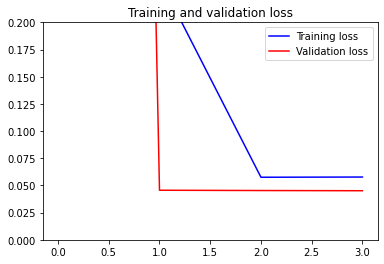

In [28]:
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="Validation loss")
plt.title('Training and validation loss')
plt.ylim(0,0.2) #On zoome pour regarder en détail
legend = plt.legend()
plt.show()

In [29]:
model.predict(X_test[0:1323])

array([[ 0.16862302],
       [-0.11455531],
       [-0.19968028],
       ...,
       [-0.05242534],
       [ 0.14386944],
       [-0.03697295]], dtype=float32)

On remarque qu'avec uniquement une couche, notre modèle fait de l'underfitting, car la pente "loss", continue de baisser. Nous pouvons faire l'hypothèse que nous avons interrompu le modèle trop tôt.

- **Troisième CNN avec plusieurs couches**

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
# define model
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=8, activation='relu', input_shape=(100, X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=6, activation='relu', input_shape=(100, X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape=(100, X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100, X.shape[2])))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [32]:
history = model.fit(X_train, Y_train, epochs=5, validation_split = 0.2)

Epoch 1/5
133/133 [==============================] - 2s 11ms/step - loss: 1049.5751 - val_loss: 0.0269
Epoch 2/5
133/133 [==============================] - 1s 10ms/step - loss: 0.0260 - val_loss: 0.0309
Epoch 3/5
133/133 [==============================] - 1s 10ms/step - loss: 0.1150 - val_loss: 0.0333
Epoch 4/5
133/133 [==============================] - 1s 11ms/step - loss: 0.0307 - val_loss: 0.0301
Epoch 5/5
133/133 [==============================] - 1s 10ms/step - loss: 0.0279 - val_loss: 0.0280


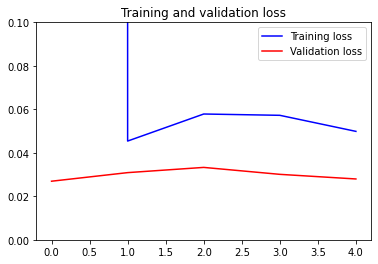

In [33]:
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="Validation loss")
plt.title('Training and validation loss')
plt.ylim(0,0.1)
legend = plt.legend()
plt.show()

In [34]:
test_loss = model.evaluate([X_test], Y_test)

42/42 [==============================] - 0s 4ms/step - loss: 0.0347


## Recherche des hyperparamètres  pour un modèle avec 3 couches

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

In [59]:
# Importation des packages
from hyperopt import hp # pour une première utilisation : pip install hyperopt
import kerastuner as kt # pour une première utilisation :  pip install keras-tuner
hp = kt.HyperParameters()

from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from kerastuner.tuners import Hyperband
from keras.models import load_model
from tensorflow.keras import metrics

In [60]:
# On indique les hypers parametres que nous voulons tester ainsi que les choix possibles : 

# Le nombre de filtres 
filters= hp.Choice('num_filters', [16,32,64,128])
#kernel_size = hp.Choice("num_kernel",[1,2,3,4,5,6])
# La taille du vecteur de sortie et la fonction d'activation 
Dense(units= hp.Int('units', 1, 512, step=10))

# Le learning rate 
#activation = hp.Float('learning_rate',min_value=1e-5, max_value=1e-2, sampling='LOG',default=1e-3)

In [61]:
### SANS NUM_CLASSES
INPUT_SHAPE = (100, X.shape[2]) # Taille des images

# Création de la classe CNNHyperModel permettant de modifier les parametres souhaités

class CNNHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = keras.Sequential()
        model.add(Conv1D( filters=16, kernel_size=2, activation="relu", input_shape=self.input_shape))
        model.add(Conv1D(filters=hp.Choice("num_filters_1", values=[32,16], default=32),kernel_size = 2, activation="relu"))
        #model.add(Conv1D, kernel_size = hp.Choce("num_kernel_1", values = [1,2,3,4,5,6], default=2))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(rate=hp.Float("dropout_1", min_value=0.0, max_value=0.5, default=0.25, step=0.05,)))
        
        model.add(Conv1D(filters=32, kernel_size=2, activation="relu"))
        model.add(Conv1D(filters=hp.Choice("num_filters_2", values=[32, 64], default=64,),activation="relu",kernel_size=3,))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(rate=hp.Float("dropout_2", min_value=0.0, max_value=0.5, default=0.25, step=0.05,)))
        
        model.add(Conv1D(filters=64, kernel_size=2, activation="relu"))
        model.add(Conv1D(filters=hp.Choice("num_filters_3", values=[64,128], default=128,),activation="relu",kernel_size=3,))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(rate=hp.Float("dropout_3", min_value=0.0, max_value=0.5, default=0.25, step=0.05,)))

        
        #model.add(Conv1D(filters=128, kernel_size=3, activation="relu"))
        #model.add(Conv1D(filters=hp.Choice("num_filters_4", values=[128,256], default=256,),activation="relu",kernel_size=3,))
        #model.add(MaxPooling1D(pool_size=2))
        #model.add(Dropout(rate=hp.Float("dropout_4", min_value=0.0, max_value=0.5, default=0.25, step=0.05,)))
        

        model.add(Flatten())
        model.add(Dense(units=hp.Int("units", min_value=32, max_value=512, step=32, default=128),activation="relu"))
        model.add(Dropout(rate=hp.Float("dropout_5", min_value=0.0, max_value=0.5, default=0.25, step=0.05 )))
        model.add(Dense(1, activation="linear"))

        model.compile(optimizer=keras.optimizers.Adam(hp.Float("learning_rate",min_value=1e-4,max_value=1e-2,sampling="LOG",default=1e-3,)
            ), loss="mse")
        return model
    
    
hypermodel = CNNHyperModel(input_shape = INPUT_SHAPE)

In [62]:
HYPERBAND_MAX_EPOCHS = 10# Nombre maximum d'époques d'entrainement
MAX_TRIALS = 20 #  Nombre de combinaisons d'hyperparamètres qui seront testées
EXECUTION_PER_TRIAL = 3 # Nombre de modèles construits et ajustés
SEED = 1

**Hyperband** est une version optimisée de RandomSearch (fonction qui échantillonne au hasard des combinaisons d'hyperparamètres et les teste) qui utilise l'arrêt anticipé pour accélérer le processus de réglage des hyperparamètres. L'idée principale est d'adapter un grand nombre de modèles pour un petit nombre d'époques et de ne continuer la formation que pour les modèles atteignant la plus grande précision sur l'ensemble de validation. 

La variable *HYPERBAND_MAX_EPOCHS* est le nombre maximum d'époques pour lesquelles un modèle peut être entraîné.

Notre objectif est de minimiser *val_loss*, qui correspond à l'éacart entre le Y prédit et le véritable Y. Cela permet de savoir comme notre modèle "généralise" ce qu'il a appris.

In [63]:
#HYPERBAND_MAX_EPOCHS
tuner = Hyperband(
    
    hypermodel, 
    objective = 'val_loss',
    seed = SEED,
    
    max_epochs= HYPERBAND_MAX_EPOCHS, 
    executions_per_trial=EXECUTION_PER_TRIAL, directory='PROJET_1', project_name='Safran_3couches')

In [64]:
# Récapitulatif des parametres à tester :
tuner.search_space_summary()

Search space summary
Default search space size: 9
num_filters_1 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 16], 'ordered': True}
dropout_1 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
num_filters_2 (Choice)
{'default': 64, 'conditions': [], 'values': [32, 64], 'ordered': True}
dropout_2 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
num_filters_3 (Choice)
{'default': 128, 'conditions': [], 'values': [64, 128], 'ordered': True}
dropout_3 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
units (Int)
{'default': 128, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
dropout_5 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_va

In [65]:
#### ATTENTION A NE PAS RELANCER 
# ou alors en s'exposant au risque d'attendre plus de 1 heure que la cellule ait fini de s'exécuter
# en effet, l'algorithme va tester toutes les combinaisons possibles pour les hypers parametres 

N_EPOCH_SEARCH = 10
tuner.search(X_train, Y_train, epochs = N_EPOCH_SEARCH, validation_split = 0.1)

Trial 30 Complete [00h 01m 26s]
val_loss: 0.19485689202944437

Best val_loss So Far: 0.16576802730560303
Total elapsed time: 00h 17m 19s
INFO:tensorflow:Oracle triggered exit


In [75]:
tuner.results_summary()

Results summary
Results in PROJET_1\Safran
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_filters_1: 32
dropout_1: 0.25
num_filters_2: 32
dropout_2: 0.15000000000000002
num_filters_3: 64
dropout_3: 0.15000000000000002
units: 192
dropout_5: 0.4
learning_rate: 0.000926543735982781
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.16576802730560303
Trial summary
Hyperparameters:
num_filters_1: 16
dropout_1: 0.05
num_filters_2: 32
dropout_2: 0.0
num_filters_3: 64
dropout_3: 0.25
units: 320
dropout_5: 0.45
learning_rate: 0.0007880149255876653
tuner/epochs: 4
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.16577128072579703
Trial summary
Hyperparameters:
num_filters_1: 32
dropout_1: 0.45
num_filters_2: 64
dropout_2: 0.25
num_filters_3: 128
dropout_3: 0.2
units: 256
dropout_5: 0.25
learning_rate: 0.0021830821185095817
tuner/epochs: 4
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Scor

In [72]:
# Récupération du meilleur modèle
best_model = tuner.get_best_models(num_models=1)[0]
eval_loss = best_model.evaluate(X_test, Y_test)

42/42 [==============================] - 0s 3ms/step - loss: 0.0131


## Recherche des hyperparamètres  pour un modèle avec  4 couches

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

In [115]:
# On indique les hypers parametres que nous voulons tester ainsi que les choix possibles : 

# Le nombre de filtres 
filters= hp.Choice('num_filters', [16,32,64,128])

Dense(units= hp.Int('units', 1, 512, step=10))

# Le learning rate 
#activation = hp.Float('learning_rate',min_value=1e-5, max_value=1e-2, sampling='LOG',default=1e-3)

In [116]:
### SANS NUM_CLASSES
INPUT_SHAPE = (100, X.shape[2]) # Taille des images

# Création de la classe CNNHyperModel permettant de modifier les parametres souhaités

class CNNHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = keras.Sequential()
        
        model.add(Conv1D(filters=hp.Choice("num_filters_1", values=[32,16], default=32),kernel_size = 2, activation="relu"))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(rate=hp.Float("dropout_1", min_value=0.0, max_value=0.5, default=0.25, step=0.05,)))
        
        model.add(Conv1D(filters=hp.Choice("num_filters_2", values=[32, 64], default=64,),activation="relu",kernel_size=2))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(rate=hp.Float("dropout_2", min_value=0.0, max_value=0.5, default=0.25, step=0.05,)))
        
        model.add(Conv1D(filters=hp.Choice("num_filters_3", values=[64,128], default=128,),activation="relu",kernel_size=2))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(rate=hp.Float("dropout_3", min_value=0.0, max_value=0.5, default=0.25, step=0.05,)))

        model.add(Conv1D(filters=hp.Choice("num_filters_4", values=[128,256], default=256,),activation="relu",kernel_size=2))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(rate=hp.Float("dropout_4", min_value=0.0, max_value=0.5, default=0.25, step=0.05,)))
        
        model.add(Flatten())
        
        model.add(Dense(units=hp.Int("units", min_value=32, max_value=512, step=32, default=128),activation="relu"))
        model.add(Dropout(rate=hp.Float("dropout_5", min_value=0.0, max_value=0.5, default=0.25, step=0.05 )))
        
        model.add(Dense(1, activation="linear"))

        model.compile(optimizer=keras.optimizers.Adam(hp.Float("learning_rate",min_value=1e-4,max_value=1e-2,sampling="LOG",default=1e-3,)
            ), loss="mse")
        return model
    
    
hypermodel = CNNHyperModel(input_shape = INPUT_SHAPE)

In [117]:
HYPERBAND_MAX_EPOCHS = 10# Nombre maximum d'époques d'entrainement
MAX_TRIALS = 20 #  Nombre de combinaisons d'hyperparamètres qui seront testées
EXECUTION_PER_TRIAL = 3 # Nombre de modèles construits et ajustés
SEED = 1

In [119]:
#HYPERBAND_MAX_EPOCHS
tuner = Hyperband(
    
    hypermodel, 
    objective = 'val_loss',
    seed = SEED,
    
    max_epochs= HYPERBAND_MAX_EPOCHS, 
    executions_per_trial=EXECUTION_PER_TRIAL, directory='PROJET_2', project_name='Safran_couches_4')

In [120]:
# Récapitulatif des parametres à tester :
tuner.search_space_summary()

Search space summary
Default search space size: 11
num_filters_1 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 16], 'ordered': True}
dropout_1 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
num_filters_2 (Choice)
{'default': 64, 'conditions': [], 'values': [32, 64], 'ordered': True}
dropout_2 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
num_filters_3 (Choice)
{'default': 128, 'conditions': [], 'values': [64, 128], 'ordered': True}
dropout_3 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
num_filters_4 (Choice)
{'default': 256, 'conditions': [], 'values': [128, 256], 'ordered': True}
dropout_4 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
units (Int)
{'default': 128, 'conditions': [], 'min_value': 32, 'max_value': 512

In [121]:
#### ATTENTION A NE PAS RELANCER 
# ou alors en s'exposant au risque d'attendre plus de 1 heure que la cellule ait fini de s'exécuter
# en effet, l'algorithme va tester toutes les combinaisons possibles pour les hypers parametres 

N_EPOCH_SEARCH = 20
tuner.search(X_train, Y_train, epochs = N_EPOCH_SEARCH, validation_split = 0.1)

Trial 30 Complete [00h 02m 49s]
val_loss: 0.03075774945318699

Best val_loss So Far: 0.022189967334270477
Total elapsed time: 00h 28m 19s
INFO:tensorflow:Oracle triggered exit


In [123]:
# Récupération du meilleur modèle
best_model = tuner.get_best_models(num_models=1)[0]
eval_loss = best_model.evaluate(X_test, Y_test)

42/42 [==============================] - 3s 10ms/step - loss: 0.0059


In [126]:
tuner.results_summary()

Results summary
Results in PROJET_2\Safran_couches_4
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_filters_1: 32
dropout_1: 0.35000000000000003
num_filters_2: 32
dropout_2: 0.45
num_filters_3: 128
dropout_3: 0.05
num_filters_4: 256
dropout_4: 0.45
units: 256
dropout_5: 0.2
learning_rate: 0.003964886305018653
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: c9de9a53eabb2220ff5bbc27d81eb8cb
Score: 0.022189967334270477
Trial summary
Hyperparameters:
num_filters_1: 32
dropout_1: 0.4
num_filters_2: 64
dropout_2: 0.05
num_filters_3: 64
dropout_3: 0.25
num_filters_4: 256
dropout_4: 0.45
units: 288
dropout_5: 0.35000000000000003
learning_rate: 0.005117045969850107
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.022264262661337852
Trial summary
Hyperparameters:
num_filters_1: 16
dropout_1: 0.25
num_filters_2: 64
dropout_2: 0.30000000000000004
num_filters_3: 64
dropout_

In [124]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 99, 32)            1824      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 49, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 48, 32)            2080      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 24, 32)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 23, 128)           8